In [ ]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import requests
sns.set_theme()
import datetime
from datetime import datetime

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#**Đọc dữ liệu**

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive/Thạc sĩ/IT4868 - Khai phá Web/Tiểu luận/EDA')

data_dir = './data_ml-1m/'

rating_file = data_dir + 'ratings.dat'
user_file = data_dir + 'users.dat'
movie_file = data_dir + 'movies.dat'

if not os.path.exists(rating_file):
    print(f"File not found: {rating_file}")
else:
    print(f"File found: {rating_file}")


File found: ./data_ml-1m/ratings.dat


In [ ]:
df_ratings = pd.read_csv(rating_file, sep='::', header=None, names=['user_id', 'movie_id', 'rating', 'timestamp'], encoding='latin1', engine='python')
# df_movies = pd.read_csv(movie_file, sep='::', header=None, names=['movie_id', 'title', 'genre'], encoding='latin1', engine='python')
df_movies = pd.read_csv('./df_movies.csv')

df_users = pd.read_csv(user_file, sep='::', header=None, names=['user_id', 'gender', 'age', 'occupation', 'zipcode'], encoding='latin1', engine='python')


In [ ]:
print(df_ratings.info())
print(df_movies.info())
print(df_users.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype
---  ------     --------------    -----
 0   user_id    1000209 non-null  int64
 1   movie_id   1000209 non-null  int64
 2   rating     1000209 non-null  int64
 3   timestamp  1000209 non-null  int64
dtypes: int64(4)
memory usage: 30.5 MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3873 entries, 0 to 3872
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   movie_id      3873 non-null   int64 
 1   imdb_id       3873 non-null   object
 2   title         3873 non-null   object
 3   genre         3873 non-null   object
 4   release_year  3873 non-null   int64 
 5   type          3873 non-null   object
dtypes: int64(2), object(4)
memory usage: 181.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):

#**Data Pre-processing & EDA**

##**Movies Data**

In [ ]:
df_movies

,movie_id,imdb_id,title,genre,release_year,type
0,1,tt0114709,Toy Story,Animation|Children's|Comedy,1995,Movie
1,2,tt0113497,Jumanji,Adventure|Children's|Fantasy,1995,Movie
2,3,tt0113228,Grumpier Old Men,Comedy|Romance,1995,Movie
3,4,tt0114885,Waiting to Exhale,Comedy|Drama,1995,Movie
4,5,tt0113041,Father of the Bride Part II,Comedy,1995,Movie
...,...,...,...,...,...,...
3868,3948,tt0212338,Meet the Parents,Comedy,2000,Movie
3869,3949,tt0180093,Requiem for a Dream,Drama,2000,Movie
3870,3950,tt0170691,Tigerland,Drama,2000,Movie
3871,3951,tt0202641,Two Family House,Drama,2000,Movie


In [ ]:
print(df_movies.columns)

Index(['movie_id', 'imdb_id', 'title', 'genre', 'release_year', 'type'], dtype='object')


**Lọc ra các bộ phim có chữ The và A bị đảo ngược ra đằng sau**

In [ ]:
# # Lọc các tiêu đề có ", The" hoặc ", A" ở cuối
# filtered_movies = df_movies[df_movies['title'].str.contains(r", The$|, A$", case=False, na=False)]
# filtered_movies

In [ ]:
# # Sửa lại tiêu đề phim
# def fix_title(title):
#     if title.endswith(", The"):
#         return "The " + title.replace(", The", "")
#     elif title.endswith(", A"):
#         return "A " + title.replace(", A", "")
#     return title

# # Áp dụng hàm sửa tiêu đề cho các phim đã lọc
# df_movies.loc[filtered_movies.index, 'title'] = filtered_movies['title'].apply(fix_title)


In [ ]:
# df_movies[df_movies['movie_id'] == 1223]

In [ ]:
# # Lọc các tiêu đề có định dạng ", The (...)"
# filtered_movies2 = df_movies[df_movies['title'].str.contains(r", The \(.+\)", case=False, na=False)]
# filtered_movies2

In [ ]:
# # Hàm sửa tiêu đề phim
# def fix_title_with_parentheses(title):
#     import re
#     # Tìm và sửa tiêu đề theo định dạng ", The (...)"
#     match = re.match(r"(.+), The \(.+\)", title)
#     if match:
#         main_title = match.group(1).strip()  # Lấy phần trước ", The"
#         return f"The {main_title}"
#     return title

# df_movies.loc[filtered_movies2.index, 'title'] = filtered_movies2['title'].apply(fix_title_with_parentheses)

In [ ]:
# df_movies[df_movies['movie_id'] == 3742]

**Thu thập dữ liệu mã IMDB ID của bộ phim để có thể lấy dữ liệu về loại hình của bộ phim đó và giải thưởng của phim**

In [ ]:
import requests
import pandas as pd
from concurrent.futures import ThreadPoolExecutor, as_completed
from tqdm import tqdm

# TMDb API key
api_key = "48ac4ae3fb4d0ef41d3e33592424dde3"

# def get_imdb_id_from_tmdb(movie_title, year, api_key):
#     """
#     Lấy IMDb ID từ TMDb API.
#     """
#     search_url = f"https://api.themoviedb.org/3/search/movie"
#     movie_url_template = "https://api.themoviedb.org/3/movie/{tmdb_id}"

#     # Tìm kiếm phim trên TMDb
#     params = {
#         "query": movie_title,
#         "year": year,
#         "api_key": api_key
#     }
#     try:
#         response = requests.get(search_url, params=params)
#         response.raise_for_status()
#         data = response.json()

#         # Lọc kết quả khớp chính xác với tiêu đề và năm phát hành
#         for movie in data["results"]:
#             if movie["title"].lower() == movie_title.lower() and str(movie["release_date"]).startswith(str(year)):
#                 tmdb_id = movie["id"]

#                 # Lấy chi tiết phim từ TMDb
#                 movie_url = movie_url_template.format(tmdb_id=tmdb_id)
#                 response = requests.get(movie_url, params={"api_key": api_key})
#                 response.raise_for_status()
#                 movie_data = response.json()

#                 # Trả về IMDb ID nếu có
#                 return movie_data.get("imdb_id")

#         return None  # Nếu không tìm thấy phim chính xác

#     except requests.exceptions.RequestException as e:
#         print(f"Lỗi khi kết nối TMDb API: {e}")
#         return None

# def process_movie(row):
#     """
#     Xử lý một phim: lấy IMDb ID.
#     """
#     title = row["title"]
#     year = row["release_year"]
#     if pd.notnull(row["imdb_id"]):
#         return row.name, row["imdb_id"]  # IMDb ID đã tồn tại

#     imdb_id = get_imdb_id_from_tmdb(title, year, api_key)
#     return row.name, imdb_id



# # Thêm cột IMDb ID nếu chưa có
# if "imdb_id" not in df_movies.columns:
#     df_movies["imdb_id"] = None

# # Lọc các phim chưa có IMDb ID
# movies_to_process = df_movies[df_movies["imdb_id"].isnull()]

# # Sử dụng ThreadPoolExecutor để xử lý song song
# with ThreadPoolExecutor(max_workers=10) as executor:
#     futures = {executor.submit(process_movie, row): row for _, row in movies_to_process.iterrows()}

#     # Sử dụng tqdm để hiển thị tiến trình
#     for future in tqdm(as_completed(futures), total=len(futures), desc="Đang xử lý"):
#         index, imdb_id = future.result()
#         if imdb_id:
#             df_movies.at[index, "imdb_id"] = imdb_id

# # Đưa cột 'imdb_id' vào bên cạnh cột 'movie_id'
# columns = df_movies.columns.tolist()
# movie_id_index = columns.index("movie_id")  # Tìm vị trí của cột 'movie_id'
# columns.insert(movie_id_index + 1, columns.pop(columns.index("imdb_id")))  # Đưa 'imdb_id' vào ngay sau 'movie_id'
# df_movies = df_movies[columns]  # Sắp xếp lại DataFrame theo thứ tự cột mới

# # Lưu kết quả sau khi sắp xếp lại cột
# output_file = "df_movies.csv"
# df_movies.to_csv(output_file, index=False)
# print(f"\nDữ liệu đã được lưu vào file: {output_file}")



In [ ]:
print(df_movies['imdb_id'].isnull().sum())

0


In [ ]:
df_movies[df_movies['imdb_id'].isnull()]

,movie_id,imdb_id,title,genre,release_year,type


In [ ]:
df_movies[df_movies['imdb_id'].duplicated()]

,movie_id,imdb_id,title,genre,release_year,type


In [ ]:
df_movies[df_movies['imdb_id'] == 'tt0115680']

,movie_id,imdb_id,title,genre,release_year,type
836,847,tt0115680,The Big Squeeze,Comedy|Drama,1996,Movie


- Ở đây có một số bộ phim bị trùng lặp mã imdb_id của nhau, nguyên nhân là do cùng một bộ phim đó nhưng có thể người dùng nhập liệu vào 2 lần với tên khác nhau, không kiểm tra lại nên dữ liệu bị trùng lặp và có sự khác biệt như vậy.

=> Giải pháp: Dựa trên tỉ lệ dữ liệu như kia thì ta thấy con số này cũng không đáng kể nên ta có thể xóa những dòng bị trùng lặp dữ liệu này


In [ ]:
df_movies.drop_duplicates(subset='imdb_id', keep='first', inplace=True)

In [ ]:
df_movies[df_movies['imdb_id'].duplicated()]

,movie_id,imdb_id,title,genre,release_year,type


**Vì một số phim không thể tìm thấy trong API được nên sẽ kết hợp cào dữ liệu bằng cách tìm kiếm tên phim và năm tiêu đề trên Google nữa để bổ sung**

In [ ]:
# import requests
# from bs4 import BeautifulSoup
# import pandas as pd
# import time
# import random
# from urllib.parse import quote

# def get_imdb_id_from_google(movie_title, year):
#     """
#     Lấy IMDb ID từ Google bằng cách tìm kiếm.
#     """
#     search_query = f"{movie_title} {year} site:imdb.com"
#     encoded_query = quote(search_query)  # Mã hóa URL
#     url = f"https://www.google.com/search?q={encoded_query}"

#     user_agents = [
#     "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36",
#     "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36",
#     "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36",
#     ]
#     headers = {
#         "User-Agent": random.choice(user_agents)
#     }

#     try:
#         response = requests.get(url, headers=headers)
#         if response.status_code == 429:
#             print("Quá nhiều yêu cầu (HTTP 429). Dừng lại.")
#             return "STOP_429"

#         response.raise_for_status()
#         soup = BeautifulSoup(response.content, "html.parser")

#         # Tìm URL IMDb trong kết quả
#         for link in soup.find_all("a"):
#             href = link.get("href")
#             if href and "imdb.com/title/tt" in href:
#                 imdb_id = href.split("/title/tt")[1].split("/")[0]
#                 return f"tt{imdb_id}"
#     except Exception as e:
#         print(f"Lỗi khi tìm kiếm IMDb ID cho {movie_title} ({year}): {e}")
#     return None

# output_file = "df_movies.csv"  # Đường dẫn file lưu kết quả

# # Thêm cột IMDb ID nếu chưa có
# if "imdb_id" not in df_movies.columns:
#     df_movies["imdb_id"] = None

# # Lọc các phim chưa có IMDb ID
# movies_to_process = df_movies[df_movies["imdb_id"].isnull()]

# # Xử lý từng phim
# for index, row in movies_to_process.iterrows():
#     movie_title = row["title"]
#     release_year = row["release_year"]

#     # Thời gian nghỉ ngẫu nhiên giữa các yêu cầu
#     time.sleep(random.uniform(3, 5))

#     imdb_id = get_imdb_id_from_google(movie_title, release_year)
#     if imdb_id == "STOP_429":
#         break

#     if imdb_id:
#         df_movies.at[index, "imdb_id"] = imdb_id
#         print(f"Đã tìm thấy IMDb ID cho {movie_title} ({release_year}): {imdb_id}")
#     else:
#         print(f"Không tìm thấy IMDb ID cho {movie_title} ({release_year}).")

#     # Lưu kết quả sau mỗi lần xử lý
#     df_movies.to_csv(output_file, index=False)

# print(f"Dữ liệu đã được lưu vào file: {output_file}")


In [ ]:
# # Chỉnh sửa thông tin
# df_movies.loc[df_movies["title"] == "The Last Klezmer: Leopold Kozlowski, His Life and Music", "release_year"] = 1994
# df_movies.loc[df_movies["title"] == "Phantom Love (Ai No Borei)", "title"] = "Empire of Passion (Ai No Borei)"


In [ ]:
# # Danh sách các movie_id cần lọc
# movie_ids_to_filter = [791, 3560]

# # Lọc các phim có movie_id trong danh sách
# filtered_movies = df_movies[df_movies["movie_id"].isin(movie_ids_to_filter)]

# filtered_movies

In [ ]:
# def search_on_google_debug(title, release_year):
#     search_query = f"{title} {release_year} site:imdb.com"
#     url = f"https://www.google.com/search?q={search_query.replace(' ', '+')}"
#     print(f"Google Search URL: {url}")  # In URL ra console

# # Debug phim
# search_on_google_debug("The Last Klezmer: Leopold Kozlowski, His Life and Music", 1994)
# search_on_google_debug("Empire of Passion (Ai No Borei)", 1978)

In [ ]:
# import urllib.parse

# def search_on_google_fixed(title, release_year):
#     search_query = f"{title} {release_year} site:imdb.com"
#     encoded_query = urllib.parse.quote(search_query)  # Mã hóa toàn bộ chuỗi tìm kiếm
#     url = f"https://www.google.com/search?q={encoded_query}"
#     print(f"Google Search URL: {url}")  # In URL để kiểm tra

# # # Debug phim
# search_on_google_fixed("The Last Klezmer: Leopold Kozlowski, His Life and Music", 1994)
# search_on_google_fixed("Empire of Passion (Ai No Borei)", 1978)


**Thu thập thông tin phim đó thuộc loại phim truyền hình hay là phim chiếu rạp**

In [ ]:
# import requests
# from tqdm import tqdm
# from concurrent.futures import ThreadPoolExecutor
# import time

# API_KEY = "48ac4ae3fb4d0ef41d3e33592424dde3"
# BASE_URL = "https://api.themoviedb.org/3"

# # Hàm tra cứu thông tin loại phim qua IMDb ID
# def get_movie_type_by_imdb(imdb_id):
#     try:
#         # Tra cứu thông tin qua IMDb ID
#         find_url = f"{BASE_URL}/find/{imdb_id}"
#         params = {
#             "api_key": API_KEY,
#             "external_source": "imdb_id"
#         }
#         response = requests.get(find_url, params=params)
#         response.raise_for_status()  # Kiểm tra lỗi HTTP
#         data = response.json()

#         # Kiểm tra kết quả trả về
#         if data.get("movie_results"):
#             return "Movie"  # Nếu tìm thấy trong movies
#         elif data.get("tv_results"):
#             return "TV Show"  # Nếu tìm thấy trong TV shows

#     except Exception as e:
#         print(f"Lỗi khi xử lý IMDb ID: {imdb_id}. Chi tiết: {e}")

#     return "Unknown"  # Trả về "Unknown" nếu không tìm thấy hoặc lỗi


# # Thêm cột 'type' nếu chưa có
# if "type" not in df_movies.columns:
#     df_movies.loc[:, "type"] = None  # Sử dụng .loc để tránh cảnh báo

# # Hàm xử lý từng phim và cập nhật dữ liệu
# def process_movie(index, row):
#     imdb_id = row["imdb_id"]
#     movie_type = get_movie_type_by_imdb(imdb_id)
#     df_movies.loc[index, "type"] = movie_type  # Sử dụng .loc để cập nhật giá trị

# # Sử dụng ThreadPoolExecutor để xử lý song song
# with ThreadPoolExecutor(max_workers=10) as executor:
#     # Cập nhật tiến trình với tqdm
#     with tqdm(total=len(df_movies), desc="Đang thu thập loại phim") as pbar:
#         futures = []
#         for index, row in df_movies.iterrows():
#             futures.append(executor.submit(process_movie, index, row))

#         # Cập nhật tiến trình sau khi hoàn thành
#         for future in futures:
#             future.result()  # Chờ các công việc hoàn thành
#             pbar.update(1)

# # Lưu kết quả vào file mới
# output_file = "df_movies.csv"
# df_movies.to_csv(output_file, index=False)

# print(f"Dữ liệu đã được lưu vào: {output_file}")

In [ ]:
df_movies['type'].value_counts()

,count
type,
Movie,3860
Unknown,10
TV Show,3


In [ ]:
df_movies[df_movies['type'] == 'TV Show']

,movie_id,imdb_id,title,genre,release_year,type
281,284,tt0108876,New York Cop,Action|Crime,1996,TV Show
1647,1697,tt0898266,The Big Bang Theory,Crime,1994,TV Show
2184,2258,tt0086756,Master Ninja I,Action,1984,TV Show


In [ ]:
df_movies[df_movies['type'] == 'Unknown']

,movie_id,imdb_id,title,genre,release_year,type
678,685,tt0603482,It's My Party,Drama,1995,Unknown
711,720,tt31416047,Wallace & Gromit: The Best of Aardman Animation,Animation,1996,Unknown
760,770,tt0038426,Costa Brava,Drama,1946,Unknown
1090,1107,tt0102336,Loser,Comedy,1991,Unknown
1398,1423,tt0565364,Hearts and Minds,Drama,1996,Unknown
1518,1559,tt7282010,The Next Step,Drama,1995,Unknown
1584,1630,tt0123953,The Lay of the Land,Comedy|Drama,1997,Unknown
1684,1738,tt0120881,Vermin,Comedy,1998,Unknown
1715,1774,tt0133090,Mass Transit,Comedy|Drama,1998,Unknown
3855,3935,tt32760083,Kronos,Horror,1973,Unknown


In [ ]:
# output_file = "df_movies.csv"
# df_movies.to_csv(output_file, index=False)

**Thu thập dữ liệu về giải thưởng của các bộ phim thông qua Web Scraping động với Selenium**

In [ ]:
# from selenium import webdriver
# from selenium.webdriver.common.by import By
# from selenium.webdriver.chrome.service import Service
# from selenium.webdriver.support.ui import WebDriverWait
# from selenium.webdriver.support import expected_conditions as EC
# from bs4 import BeautifulSoup
# import time

# # Đường dẫn đến ChromeDriver
# webdriver_path = "C:\\chromedriver-win64\\chromedriver.exe"  # Thay bằng đường dẫn thực tế

# # Khởi chạy trình duyệt
# service = Service(webdriver_path)
# driver = webdriver.Chrome(service=service)

# try:
#     # Mở trang IMDb
#     url = "https://www.imdb.com/title/tt0068646/awards/"
#     driver.get(url)

#     # Chờ các phần tử trang tải xong
#     wait = WebDriverWait(driver, 10)

#     while True:
#         # Tìm tất cả các nút "More" hiện tại trên trang
#         more_buttons = driver.find_elements(By.XPATH, '//button[contains(@class, "ipc-see-more__button")]')

#         if not more_buttons:
#             # Nếu không tìm thấy nút "More" nào, thoát vòng lặp
#             break

#         for more_button in more_buttons:
#             try:
#                 # Cuộn trang xuống để làm lộ nút "More"
#                 driver.execute_script("arguments[0].scrollIntoView();", more_button)
#                 time.sleep(1)  # Chờ một chút sau khi cuộn

#                 # Nhấn nút "More"
#                 more_button.click()
#                 time.sleep(2)  # Chờ nội dung tải thêm
#             except Exception as e:
#                 continue

#     # Lấy HTML sau khi tất cả nội dung được tải
#     page_source = driver.page_source
#     soup = BeautifulSoup(page_source, "html.parser")

#     # Tìm tất cả các phần giải thưởng
#     award_sections = soup.find_all("section", class_="ipc-page-section")

#     # Dictionary để lưu kết quả
#     award_results = {}

#     # Duyệt qua từng phần giải thưởng
#     for section in award_sections:
#         # Lấy tên giải thưởng
#         award_title_tag = section.find("h3", class_="ipc-title__text")
#         if award_title_tag:
#             span_tag = award_title_tag.find("span")
#             if span_tag and span_tag.get("id", "").startswith("ev"):
#                 award_name = award_title_tag.text.strip()

#                 # Tìm tất cả các mục giải thưởng (li)
#                 award_items = section.find_all("li", class_="ipc-metadata-list-summary-item")

#                 # Đếm số lần Winner và tổng số lần đề cử
#                 winner_count = 0
#                 total_count = 0

#                 for item in award_items:
#                     total_count += 1  # Tăng tổng số lần đề cử
#                     # Kiểm tra nếu là Winner
#                     if "Winner" in item.text or "winner" in item.text:
#                         winner_count += 1

#                 # Lưu kết quả vào dictionary
#                 award_results[award_name] = (winner_count, total_count)

#     # In kết quả
#     for award_name, (winner_count, total_count) in award_results.items():
#         print(f"Award: {award_name} (Winner {winner_count}/{total_count})")

# finally:
#     # Đóng trình duyệt
#     driver.quit()
# # Oke chạy ổn rồi

In [ ]:
# import os
# import pandas as pd
# from selenium import webdriver
# from selenium.webdriver.common.by import By
# from selenium.webdriver.chrome.service import Service
# from bs4 import BeautifulSoup
# import time
# from tqdm import tqdm

# # Đường dẫn đến ChromeDriver
# webdriver_path = "C:\\chromedriver-win64\\chromedriver.exe"

# # Khởi tạo trình duyệt
# service = Service(webdriver_path)
# driver = webdriver.Chrome(service=service)

# # Đường dẫn file CSV
# output_file = 'movies_awards.csv'

# # Đọc dữ liệu từ file CSV nếu tồn tại
# if os.path.exists(output_file):
#     df_existing = pd.read_csv(output_file)
#     processed_ids = set(df_existing['movie_id'])
# else:
#     df_existing = pd.DataFrame()
#     processed_ids = set()

# # List lưu dữ liệu giải thưởng
# award_data = []

# try:
#     for index, row in tqdm(df_movies.iterrows(), total=df_movies.shape[0], desc="Processing Movies"):
#         imdb_id = row['imdb_id']
#         movie_id = row['movie_id']

#         # Bỏ qua nếu bộ phim đã được xử lý
#         if movie_id in processed_ids:
#             print(f"Skipping movie {movie_id} ({row['title']}) already processed.")
#             continue

#         movie_title = row['title']
#         url = f"https://www.imdb.com/title/{imdb_id}/awards/"

#         try:
#             driver.get(url)

#             # Tải toàn bộ nội dung trang
#             max_attempts = 10
#             attempt = 0
#             while attempt < max_attempts:
#                 more_buttons = driver.find_elements(By.XPATH, '//button[contains(@class, "ipc-see-more__button")]')
#                 if not more_buttons:
#                     break
#                 for button in more_buttons:
#                     try:
#                         driver.execute_script("arguments[0].scrollIntoView();", button)
#                         button.click()
#                         time.sleep(2)
#                     except Exception:
#                         continue
#                 attempt += 1

#             # Phân tích HTML
#             soup = BeautifulSoup(driver.page_source, "html.parser")
#             award_sections = soup.find_all("section", class_="ipc-page-section")

#             # Thu thập giải thưởng
#             movie_awards = []
#             for section in award_sections:
#                 award_title_tag = section.find("h3", class_="ipc-title__text")
#                 if award_title_tag:
#                     span_tag = award_title_tag.find("span")
#                     if span_tag and span_tag.get("id", "").startswith("ev"):
#                         award_name = award_title_tag.text.strip()

#                         # Tìm tất cả các mục giải thưởng (li)
#                         award_items = section.find_all("li", class_="ipc-metadata-list-summary-item")

#                         # Đếm số lần Winner và tổng số lần đề cử
#                         winner_count = 0
#                         nominations_count = 0

#                         for item in award_items:
#                             nominations_count += 1  # Tăng tổng số lần đề cử
#                             # Kiểm tra nếu là Winner
#                             if "Winner" in item.text or "winner" in item.text:
#                                 winner_count += 1

#                         # Lưu kết quả vào danh sách giải thưởng
#                         movie_awards.append({
#                             'award_name': award_name,
#                             'winner_count': winner_count,
#                             'nominations_count': nominations_count
#                         })

#             # Lưu dữ liệu
#             award_data.append({
#                 'movie_id': movie_id,
#                 'title': movie_title,
#                 'genre': row['genre'],
#                 'release_year': row['release_year'],
#                 'type': row['type'],
#                 'awards': str(movie_awards) if movie_awards else "No awards"
#             })

#             # Ghi dữ liệu mới vào file CSV ngay sau khi xử lý xong mỗi phim
#             df_new = pd.DataFrame([award_data[-1]])
#             df_new.to_csv(output_file, index=False, mode='a', header=not os.path.exists(output_file))

#         except Exception as e:
#             print(f"Error processing movie {movie_title}: {e}")
#             continue

# finally:
#     driver.quit()


In [ ]:
df_awards = pd.read_csv('movies_awards.csv')
df_awards

,movie_id,title,genre,release_year,type,awards
0,1,Toy Story,Animation|Children's|Comedy,1995,Movie,"[{'award_name': 'Academy Awards, USA', 'winner..."
1,2,Jumanji,Adventure|Children's|Fantasy,1995,Movie,"[{'award_name': 'Academy of Science Fiction, F..."
2,3,Grumpier Old Men,Comedy|Romance,1995,Movie,"[{'award_name': 'American Comedy Awards, USA',..."
3,4,Waiting to Exhale,Comedy|Drama,1995,Movie,[{'award_name': 'ASCAP Film and Television Mus...
4,5,Father of the Bride Part II,Comedy,1995,Movie,"[{'award_name': 'American Comedy Awards, USA',..."
...,...,...,...,...,...,...
3878,3948,Meet the Parents,Comedy,2000,Movie,"[{'award_name': 'Academy Awards, USA', 'winner..."
3879,3949,Requiem for a Dream,Drama,2000,Movie,"[{'award_name': 'Academy Awards, USA', 'winner..."
3880,3950,Tigerland,Drama,2000,Movie,[{'award_name': 'Boston Society of Film Critic...
3881,3951,Two Family House,Drama,2000,Movie,[{'award_name': 'Chicago International Film Fe...


In [ ]:
df_awards[df_awards['awards'] == "No awards"]

,movie_id,title,genre,release_year,type,awards
8,9,Sudden Death,Action,1995,Movie,No awards
11,12,Dracula: Dead and Loving It,Comedy|Horror,1995,Movie,No awards
32,33,Wings of Courage,Adventure|Romance,1995,Movie,No awards
36,37,Across the Sea of Time,Documentary,1995,Movie,No awards
50,51,Guardian Angel,Action|Drama|Thriller,1994,Movie,No awards
...,...,...,...,...,...,...
3868,3938,The Slumber Party Massacre,Horror,1982,Movie,No awards
3869,3939,The Slumber Party Massacre II,Horror,1987,Movie,No awards
3870,3940,The Slumber Party Massacre III,Horror,1990,Movie,No awards
3871,3941,Sorority House Massacre,Horror,1986,Movie,No awards


In [ ]:
print(df_awards.dtypes)

movie_id         int64
title           object
genre           object
release_year     int64
type            object
awards          object
dtype: object


In [ ]:
import ast  # Để chuyển đổi chuỗi JSON-like thành danh sách Python

# Hàm làm sạch JSON
def clean_json(value):
    try:
        return ast.literal_eval(value)  # Chuyển chuỗi JSON-like thành danh sách Python
    except (ValueError, SyntaxError):
        return []  # Trả về danh sách rỗng nếu không hợp lệ

df_awards["awards"] = df_awards["awards"].apply(clean_json)

# Xuất lại dữ liệu sau khi làm sạch
df_awards.to_csv("movies_awards_cleaned.csv", index=False)



In [ ]:
print(df_awards.iloc[8])

movie_id                   9
title           Sudden Death
genre                 Action
release_year            1995
type                   Movie
awards                    []
Name: 8, dtype: object


**Bộ phim nào nhận được nhiều giải thưởng nhất ?**

In [ ]:
# Tính tổng số giải thưởng cho từng phim
df_awards["total_wins"] = df_awards["awards"].apply(
    lambda awards: sum(award["winner_count"] for award in awards)
)

# Tìm phim có số giải thưởng cao nhất
most_awarded_movie = df_awards.loc[df_awards["total_wins"].idxmax()]

print(f"Bộ phim đạt nhiều giải thưởng nhất: {most_awarded_movie['title']} với {most_awarded_movie['total_wins']} giải thưởng.")


Bộ phim đạt nhiều giải thưởng nhất: American Beauty với 95 giải thưởng.



**Thể loại phim nào có khả năng cao nhất giành được giải thưởng?**










In [ ]:
# Tách thể loại thành các dòng riêng biệt
df_genres = df_awards.assign(genre=df_awards["genre"].str.split("|")).explode("genre")

# Tính tổng số giải thưởng theo thể loại
genre_awards = df_genres.groupby("genre")["total_wins"].sum().reset_index()

genre_awards = genre_awards.sort_values(by="total_wins", ascending=False)
print(genre_awards)


          genre  total_wins
7         Drama        8524
4        Comedy        3560
13      Romance        2262
0        Action        1696
15     Thriller        1667
16          War        1125
5         Crime        1030
14       Sci-Fi        1005
1     Adventure         950
3    Children's         700
10       Horror         686
11      Musical         643
2     Animation         538
12      Mystery         466
6   Documentary         359
8       Fantasy         268
17      Western         249
9     Film-Noir         237


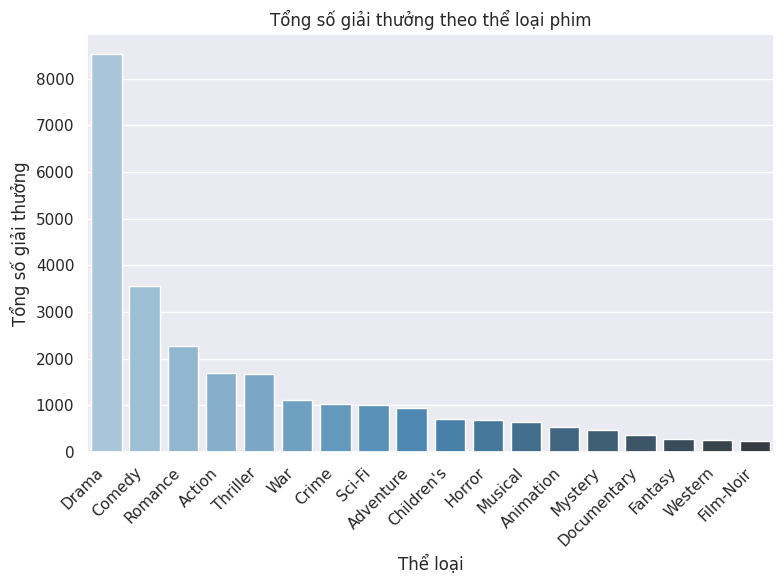

In [ ]:
plt.figure(figsize=(8, 6))
# sns.barplot(data=genre_awards, x="genre", y="total_wins", palette="Blues_d")
sns.barplot(
    data=genre_awards, x="genre", y="total_wins", palette="Blues_d",
    hue="genre",
    legend=False
)
plt.xlabel("Thể loại")
plt.ylabel("Tổng số giải thưởng")
plt.title("Tổng số giải thưởng theo thể loại phim")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [ ]:
# Tách cột 'awards' thành nhiều hàng
df_expanded = df_awards.explode('awards')

# Tách dữ liệu JSON trong cột 'awards' thành các cột riêng
df_expanded = pd.concat([df_expanded.drop(['awards'], axis=1), df_expanded['awards'].apply(pd.Series)], axis=1)
df_expanded = df_expanded.dropna(axis=1, how='all')

In [ ]:
# Thay thế NaN bằng giá trị 0 trong các cột 'winner_count' và 'nominations_count'
df_expanded['winner_count'] = df_expanded['winner_count'].fillna(0).astype(int)
df_expanded['nominations_count'] = df_expanded['nominations_count'].fillna(0).astype(int)
df_expanded.to_csv("movies_awards_cleaned.csv", index=False)

print(df_expanded.dtypes)


movie_id              int64
title                object
genre                object
release_year          int64
type                 object
total_wins            int64
award_name           object
winner_count          int64
nominations_count     int64
dtype: object


In [ ]:
df_expanded

,movie_id,title,genre,release_year,type,total_wins,award_name,winner_count,nominations_count
0,1,Toy Story,Animation|Children's|Comedy,1995,Movie,26,"Academy Awards, USA",1,4
0,1,Toy Story,Animation|Children's|Comedy,1995,Movie,26,"Academy of Science Fiction, Fantasy & Horror F...",0,2
0,1,Toy Story,Animation|Children's|Comedy,1995,Movie,26,Annie Awards,5,5
0,1,Toy Story,Animation|Children's|Comedy,1995,Movie,26,ASCAP Film and Television Music Awards,1,1
0,1,Toy Story,Animation|Children's|Comedy,1995,Movie,26,BAFTA Awards,0,1
...,...,...,...,...,...,...,...,...,...
3882,3952,The Contender,Drama|Thriller,2000,Movie,1,Online Film Critics Society Awards,0,1
3882,3952,The Contender,Drama|Thriller,2000,Movie,1,"Political Film Society, USA",0,2
3882,3952,The Contender,Drama|Thriller,2000,Movie,1,Screen Actors Guild Awards,0,3
3882,3952,The Contender,Drama|Thriller,2000,Movie,1,Phoenix Film Critics Society Awards,0,2


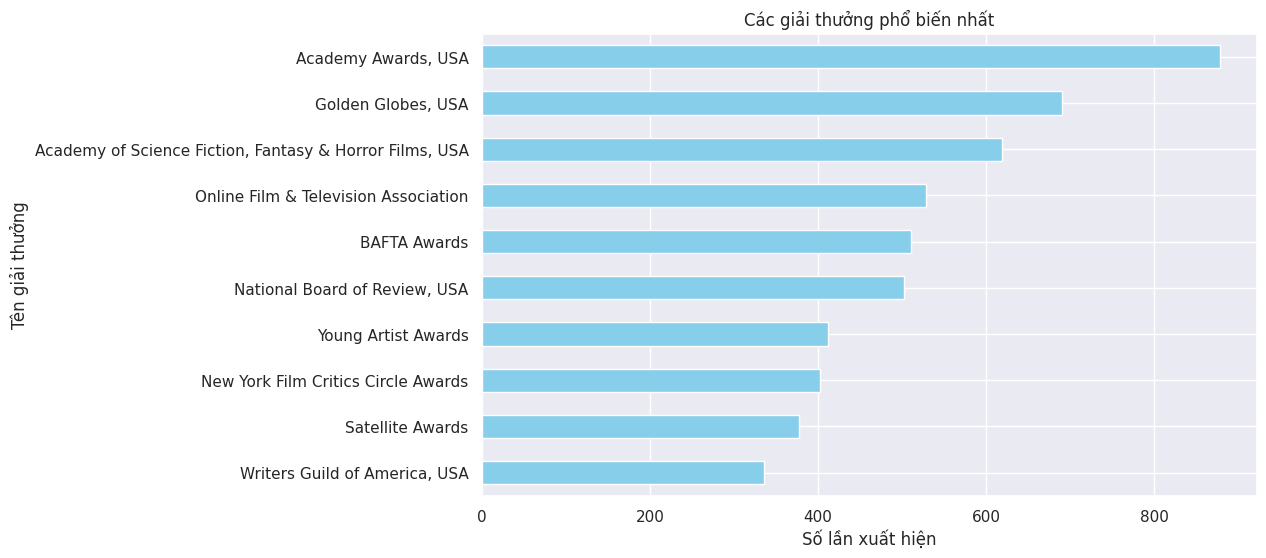

In [ ]:
# Số lần xuất hiện của mỗi giải thưởng
award_popularity = df_expanded['award_name'].value_counts()

# Tỷ lệ thắng của từng giải thưởng
award_win_rate = df_expanded.groupby('award_name')['winner_count'].sum() / df_expanded.groupby('award_name')['nominations_count'].sum()

award_popularity.head(10).plot(kind='barh', figsize=(10, 6), color='skyblue')
plt.title('Các giải thưởng phổ biến nhất')
plt.xlabel('Số lần xuất hiện')
plt.ylabel('Tên giải thưởng')
plt.gca().invert_yaxis()
plt.show()



In [ ]:
# Tách thể loại phim thành các hàng riêng biệt
df_expanded['genre_split'] = df_expanded['genre'].str.split('|')
df_genre = df_expanded.explode('genre_split')
df_genre = df_genre.drop(columns=["genre"])
df_genre.insert(3, "genre", df_genre.pop("genre_split"))

df_genre['win_rate'] = df_genre['winner_count'] / df_genre['nominations_count']
df_genre['win_rate'] = df_genre['win_rate'].fillna(0)  # Xử lý giá trị NaN
df_genre

,movie_id,title,release_year,genre,type,total_wins,award_name,winner_count,nominations_count,win_rate
0,1,Toy Story,1995,Animation,Movie,26,"Academy Awards, USA",1,4,0.25
0,1,Toy Story,1995,Children's,Movie,26,"Academy Awards, USA",1,4,0.25
0,1,Toy Story,1995,Comedy,Movie,26,"Academy Awards, USA",1,4,0.25
0,1,Toy Story,1995,Animation,Movie,26,"Academy of Science Fiction, Fantasy & Horror F...",0,2,0.00
0,1,Toy Story,1995,Children's,Movie,26,"Academy of Science Fiction, Fantasy & Horror F...",0,2,0.00
...,...,...,...,...,...,...,...,...,...,...
3882,3952,The Contender,2000,Thriller,Movie,1,Screen Actors Guild Awards,0,3,0.00
3882,3952,The Contender,2000,Drama,Movie,1,Phoenix Film Critics Society Awards,0,2,0.00
3882,3952,The Contender,2000,Thriller,Movie,1,Phoenix Film Critics Society Awards,0,2,0.00
3882,3952,The Contender,2000,Drama,Movie,1,Awards Circuit Community Awards,0,1,0.00


In [ ]:
# So sánh giữa các bộ phim cùng thể loại
genre_comparison = df_genre.groupby(['genre', 'title']).agg({
    'winner_count': 'sum',
    'nominations_count': 'sum',
    'win_rate': 'mean'
}).reset_index()

# Sắp xếp theo tỷ lệ thắng giải hoặc tổng số giải thưởng
genre_comparison = genre_comparison.sort_values(by=['genre', 'winner_count'], ascending=[True, False])
genre_comparison


,genre,title,winner_count,nominations_count,win_rate
296,Action,Saving Private Ryan,64,129,0.535452
143,Action,Gladiator,43,126,0.414236
327,Action,Star Wars: Episode IV - A New Hope,43,70,0.633810
412,Action,The Matrix,40,90,0.438850
190,Action,Jurassic Park,37,56,0.741667
...,...,...,...,...,...
6345,Western,Three Amigos!,0,0,0.000000
6346,Western,Tombstone,0,2,0.000000
6349,Western,Westworld,0,4,0.000000
6350,Western,Wild Bill,0,3,0.000000


In [ ]:
# Tổng số giải thưởng và tỷ lệ thắng giải theo thể loại
genre_analysis = df_genre.groupby('genre').agg({
    'winner_count': 'sum',
    'nominations_count': 'sum'
}).reset_index()
genre_analysis['win_rate'] = genre_analysis['winner_count'] / genre_analysis['nominations_count']
print(genre_analysis.sort_values(by='win_rate', ascending=False))



          genre  winner_count  nominations_count  win_rate
6   Documentary           359                594  0.604377
16          War          1125               2220  0.506757
9     Film-Noir           237                494  0.479757
2     Animation           538               1171  0.459436
17      Western           249                553  0.450271
11      Musical           643               1439  0.446838
7         Drama          8524              19089  0.446540
13      Romance          2262               5187  0.436090
5         Crime          1030               2484  0.414654
12      Mystery           466               1132  0.411661
4        Comedy          3560               8797  0.404683
3    Children's           700               1813  0.386100
15     Thriller          1667               4355  0.382778
14       Sci-Fi          1005               2634  0.381549
10       Horror           686               1834  0.374046
1     Adventure           950               2645  0.3591

In [ ]:
# Nhóm theo loại giải thưởng
award_analysis = df_expanded.groupby('award_name').agg({
    'winner_count': 'sum',
    'nominations_count': 'sum'
}).reset_index()

# Tính tỷ lệ thắng giải
award_analysis['win_rate'] = award_analysis['winner_count'] / award_analysis['nominations_count']
award_analysis['win_rate'] = award_analysis['win_rate'].fillna(0)  # Xử lý giá trị NaN

# Sắp xếp theo tỷ lệ thắng giải
award_analysis = award_analysis.sort_values(by='win_rate', ascending=False)
award_analysis


,award_name,winner_count,nominations_count,win_rate
616,Writers Guild of Canada,2,2,1.0
618,Würzburg International Filmweekend,2,2,1.0
620,Yoga Awards,65,65,1.0
607,Washington Jewish Film Festival,1,1,1.0
608,Western Heritage Awards,9,9,1.0
...,...,...,...,...
89,Behind the Voice Actors Awards,0,1,0.0
99,Black Reel Awards for Television,0,1,0.0
572,The International Vegan Film Festival,0,1,0.0
58,Austin Film Critics Association,0,1,0.0


**Giải thưởng nào khó nhằn nhất để có thể đạt được? (Xét trong top 11 giải thưởng phim danh giá nhất toàn cầu)**

In [ ]:
# Danh sách 11 giải thưởng phim danh giá nhất toàn cầu
top_awards_list = [
    "Academy Awards, USA",
    "Golden Globes, USA",
    "BAFTA Awards",
    "Cannes Film Festival",
    "Venice Film Festival",
    "Toronto International Film Festival",
    "New York Film Critics Circle Awards",
    "Sundance Film Festival",
    "Berlin International Film Festival",
    "Hong Kong Film Award",
    "Tokyo International Film Festival"
]

# Lọc chỉ các giải thưởng danh giá nhất
top_awards_analysis = award_analysis[award_analysis['award_name'].isin(top_awards_list)]

# Sắp xếp theo tỷ lệ thắng giải
top_awards_analysis = top_awards_analysis.sort_values(by='win_rate', ascending=True)
top_awards_analysis


,award_name,winner_count,nominations_count,win_rate
10,"Academy Awards, USA",609,2448,0.248775
257,"Golden Globes, USA",434,1613,0.269064
77,BAFTA Awards,368,1331,0.276484
423,New York Film Critics Circle Awards,300,735,0.408163
135,Cannes Film Festival,187,400,0.467500
549,Sundance Film Festival,81,173,0.468208
577,Tokyo International Film Festival,37,67,0.552239
94,Berlin International Film Festival,133,223,0.596413
600,Venice Film Festival,174,288,0.604167
582,Toronto International Film Festival,44,48,0.916667


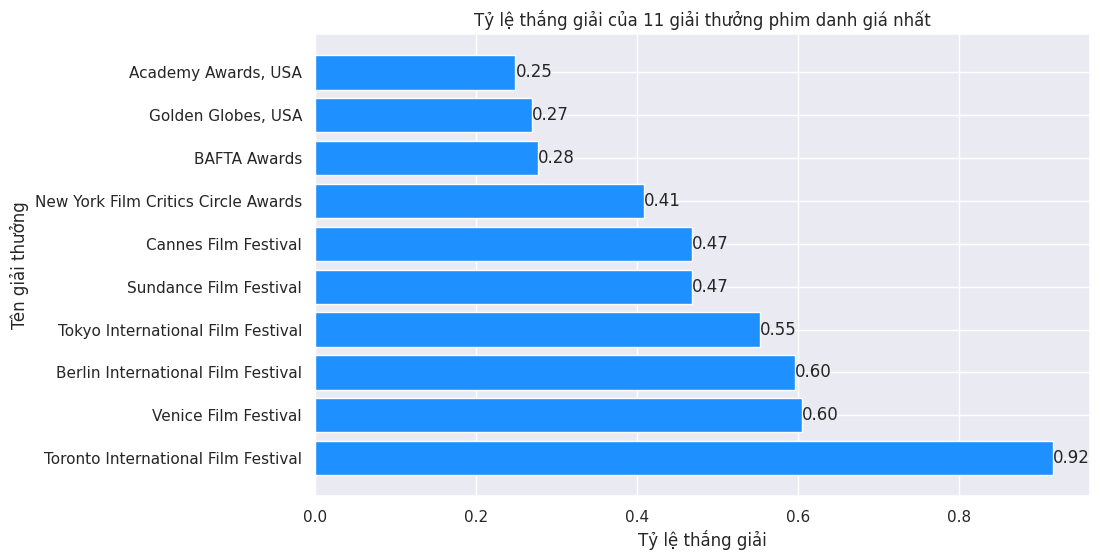

In [ ]:
plt.figure(figsize=(10, 6))
plt.barh(top_awards_analysis['award_name'], top_awards_analysis['win_rate'], color='dodgerblue')
plt.xlabel('Tỷ lệ thắng giải')
plt.ylabel('Tên giải thưởng')
plt.title('Tỷ lệ thắng giải của 11 giải thưởng phim danh giá nhất')

# Thêm giá trị lên biểu đồ
for index, value in enumerate(top_awards_analysis['win_rate']):
    plt.text(value, index, f'{value:.2f}', va='center')

plt.gca().invert_yaxis()
plt.show()


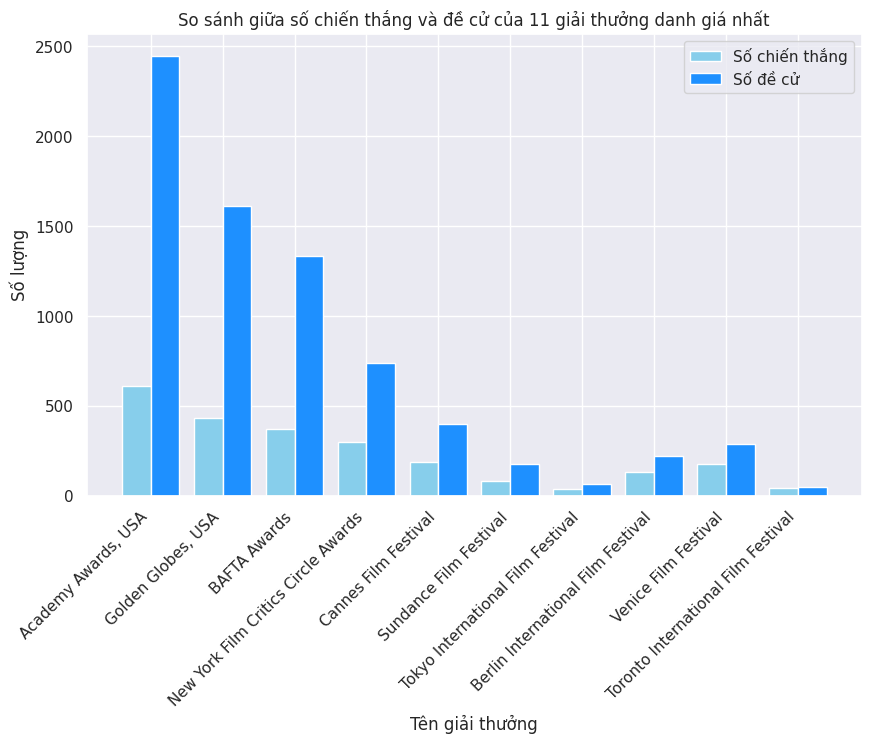

In [ ]:
award_names = top_awards_analysis['award_name']
winner_counts = top_awards_analysis['winner_count']
nomination_counts = top_awards_analysis['nominations_count']

# Thiết lập vị trí các cột
x = np.arange(len(award_names))
width = 0.4

# Vẽ biểu đồ nhóm
plt.figure(figsize=(10, 6))
plt.bar(x - width/2, winner_counts, width, label='Số chiến thắng', color='skyblue')
plt.bar(x + width/2, nomination_counts, width, label='Số đề cử', color='dodgerblue')

# Cài đặt trục và nhãn
plt.xlabel('Tên giải thưởng')
plt.ylabel('Số lượng')
plt.title('So sánh giữa số chiến thắng và đề cử của 11 giải thưởng danh giá nhất')
plt.xticks(x, award_names, rotation=45, ha='right')
plt.legend()
plt.show()

**Thu thập dữ liệu về doanh thu của phim qua Box Office Mojo bằng Web Scraping**

In [ ]:
# def search_movie_on_boxofficemojo(title, release_year):
#     base_url = "https://www.boxofficemojo.com"
#     search_url = f"{base_url}/search/"
#     params = {"q": title}
#     response = requests.get(search_url, params=params)
#     soup = BeautifulSoup(response.text, "html.parser")

#     # Tìm tất cả các kết quả
#     results = soup.find_all("a", class_="a-size-medium a-link-normal a-text-bold")
#     for result in results:
#         movie_title = result.text.strip()  # Lấy tiêu đề phim
#         parent = result.find_parent("div")  # Tìm phần tử cha chứa cả năm phát hành
#         if parent:
#             year_span = parent.find("span", class_="a-color-secondary")  # Tìm năm phát hành
#             if year_span and str(release_year) in year_span.text:
#                 movie_url = base_url + result['href']  # Lấy URL phim
#                 print(f"Found movie: {movie_title} ({release_year}) -> {movie_url}")
#                 return movie_url

#     print(f"No results found for: {title} ({release_year})")
#     return None

# movie_url = search_movie_on_boxofficemojo("Get Carter", 1971)
# print("Movie URL:", movie_url)


In [ ]:
# from bs4 import BeautifulSoup

# def get_movie_revenue(movie_url):
#     response = requests.get(movie_url)
#     soup = BeautifulSoup(response.text, "html.parser")

#     # Tìm các thông tin doanh thu
#     revenue_data = {}
#     try:
#         # Trích xuất thông tin từ bảng doanh thu
#         revenue_table = soup.find("div", {"class": "a-section a-spacing-none mojo-performance-summary-table"})
#         if revenue_table:
#             rows = revenue_table.find_all("div", {"class": "a-section"})
#             for row in rows:
#                 print(row.prettify())  # In toàn bộ nội dung của từng hàng

#     except AttributeError:
#         pass  # Nếu không tìm thấy dữ liệu

#     return revenue_data


# if movie_url:
#     revenue = get_movie_revenue(movie_url)
#     print(revenue)

In [ ]:
# import requests
# from bs4 import BeautifulSoup

# def get_movie_revenue(movie_url):
#     headers = {
#         "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"
#     }
#     response = requests.get(movie_url, headers=headers)
#     soup = BeautifulSoup(response.text, "html.parser")

#     # Tìm các thông tin doanh thu
#     revenue_data = {}
#     try:
#         # Trích xuất thông tin từ các thẻ chứa dữ liệu doanh thu
#         revenue_sections = soup.find_all("div", {"class": "a-section a-spacing-none"})
#         for section in revenue_sections:
#             label_element = section.find("span", {"class": "a-size-small"})
#             value_element = section.find("span", {"class": "money"})
#             percent_element = section.find("span", {"class": "percent"})

#             if label_element and value_element:
#                 label = label_element.text.strip().split(" ")[0]  # Lấy nhãn, bỏ phần trăm nếu có
#                 value = value_element.text.strip()
#                 percent = percent_element.text.strip() if percent_element else "N/A"

#                 if label == "Domestic":
#                     revenue_data['Domestic'] = {"value": value, "percent": percent}
#                 elif label == "International":
#                     revenue_data['International'] = {"value": value, "percent": percent}
#                 elif label == "Worldwide":
#                     revenue_data['Worldwide'] = {"value": value, "percent": "100%"}  # Worldwide luôn là 100%
#     except AttributeError:
#         pass  # Nếu không tìm thấy dữ liệu

#     return revenue_data

# if movie_url:
#     revenue = get_movie_revenue(movie_url)
#     print(revenue)


In [ ]:
# import requests
# import pandas as pd
# from concurrent.futures import ThreadPoolExecutor, as_completed
# from tqdm import tqdm
# import time

# # Hàm lấy thông tin từ API
# def search_movie_on_boxofficemojo(title, release_year):
#     base_url = "https://www.boxofficemojo.com"
#     search_url = f"{base_url}/search/"
#     params = {"q": title}
#     try:
#         response = requests.get(search_url, params=params)
#         if response.status_code != 200:
#             print(f"Failed to fetch {search_url} with status code {response.status_code}")
#             return None
#         soup = BeautifulSoup(response.text, "html.parser")
#         results = soup.find_all("a", class_="a-size-medium a-link-normal a-text-bold")
#         for result in results:
#             movie_title = result.text.strip()
#             parent = result.find_parent("div")
#             if parent:
#                 year_span = parent.find("span", class_="a-color-secondary")
#                 if year_span and str(release_year) in year_span.text:
#                     movie_url = base_url + result['href']
#                     return movie_url
#     except Exception as e:
#         print(f"Error during search: {e}")
#     return None

# # Hàm lấy doanh thu của phim
# def get_movie_revenue(movie_url):
#     headers = {
#         "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"
#     }
#     revenue_data = {}
#     try:
#         response = requests.get(movie_url, headers=headers)
#         if response.status_code != 200:
#             print(f"Failed to fetch {movie_url} with status code {response.status_code}")
#             return revenue_data
#         soup = BeautifulSoup(response.text, "html.parser")
#         revenue_sections = soup.find_all("div", {"class": "a-section a-spacing-none"})
#         for section in revenue_sections:
#             label_element = section.find("span", {"class": "a-size-small"})
#             value_element = section.find("span", {"class": "money"})
#             percent_element = section.find("span", {"class": "percent"})
#             if label_element and value_element:
#                 label = label_element.text.strip().split(" ")[0]  # Lấy nhãn, bỏ phần trăm nếu có
#                 value = value_element.text.strip()
#                 percent = percent_element.text.strip() if percent_element else "N/A"

#                 if label == "Domestic":
#                     revenue_data['Domestic'] = {"value": value, "percent": percent}
#                 elif label == "International":
#                     revenue_data['International'] = {"value": value, "percent": percent}
#                 elif label == "Worldwide":
#                     revenue_data['Worldwide'] = {"value": value, "percent": "100%"}  # Worldwide luôn là 100%
#     except Exception as e:
#         print(f"Error during revenue fetching: {e}")
#     return revenue_data

# # Hàm thu thập doanh thu cho các bộ phim trong DataFrame mà không lưu vào cột chính
# def collect_revenue_for_movies(df_movies):
#     if not {'title', 'release_year'}.issubset(df_movies.columns):
#         raise ValueError("DataFrame must contain 'title' and 'release_year' columns")

#     movie_revenues = []

#     def get_revenue_for_movie(row):
#         title = row.title
#         release_year = row.release_year
#         movie_url = search_movie_on_boxofficemojo(title, release_year)
#         if movie_url:
#             revenue = get_movie_revenue(movie_url)
#         else:
#             revenue = {"error": "Movie not found on BoxOfficeMojo"}
#         time.sleep(0.5)
#         return revenue

#     with ThreadPoolExecutor(max_workers=10) as executor:
#         for revenue in tqdm(executor.map(get_revenue_for_movie, df_movies.itertuples(index=False)), total=len(df_movies)):
#             movie_revenues.append(revenue)

#     return movie_revenues

# # Thu thập doanh thu cho tất cả các phim
# movie_revenues = collect_revenue_for_movies(df_movies)

# # Lưu kết quả vào file CSV (không lưu cột revenue vào df_movies)
# selected_columns = ['movie_id', 'title', 'genre', 'release_year']

# # Kiểm tra nếu các cột cần thiết có trong DataFrame
# missing_columns = [col for col in selected_columns if col not in df_movies.columns]
# if missing_columns:
#     raise ValueError(f"Missing columns in DataFrame: {missing_columns}")

# # Tạo DataFrame chỉ chứa các cột cần thiết và thêm doanh thu vào riêng
# df_movies_with_revenue = df_movies[selected_columns].copy()

# # Thêm cột doanh thu vào DataFrame tạm
# df_movies_with_revenue['revenue'] = movie_revenues

# # Lưu DataFrame vào file CSV mà không lưu cột revenue vào df_movies gốc
# df_movies_with_revenue.to_csv('movies_revenue.csv', index=False)

# print("\nKết quả đã được lưu vào file movies_revenue.csv")


In [ ]:
revenue_df = pd.read_csv('movies_revenue.csv')
revenue_df

,movie_id,title,genre,release_year,revenue
0,1,Toy Story,Animation|Children's|Comedy,1995,"{'Domestic': {'value': '$223,225,679', 'percen..."
1,2,Jumanji,Adventure|Children's|Fantasy,1995,"{'Domestic': {'value': '$100,499,940', 'percen..."
2,3,Grumpier Old Men,Comedy|Romance,1995,"{'Domestic': {'value': '$71,518,503', 'percent..."
3,4,Waiting to Exhale,Comedy|Drama,1995,"{'Domestic': {'value': '$67,052,156', 'percent..."
4,5,Father of the Bride Part II,Comedy,1995,"{'Domestic': {'value': '$76,594,107', 'percent..."
...,...,...,...,...,...
3878,3948,Meet the Parents,Comedy,2000,"{'Domestic': {'value': '$166,244,045', 'percen..."
3879,3949,Requiem for a Dream,Drama,2000,"{'Domestic': {'value': '$3,635,482', 'percent'..."
3880,3950,Tigerland,Drama,2000,"{'Domestic': {'value': '$139,692', 'percent': ..."
3881,3951,Two Family House,Drama,2000,"{'Domestic': {'value': '$1,015,122', 'percent'..."


In [ ]:
revenue_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   movie_id      3883 non-null   int64 
 1   title         3883 non-null   object
 2   genre         3883 non-null   object
 3   release_year  3883 non-null   int64 
 4   revenue       3883 non-null   object
dtypes: int64(2), object(3)
memory usage: 151.8+ KB


In [ ]:
import json

# Thay dấu nháy đơn bằng dấu nháy kép
revenue_df['revenue'] = revenue_df['revenue'].str.replace("'", '"')

# Chuyển đổi cột revenue từ chuỗi JSON sang dict
revenue_df['revenue'] = revenue_df['revenue'].apply(json.loads)

# Tách dữ liệu cột revenue
def extract_revenue_data(row):
    domestic = row.get('Domestic', {'value': None, 'percent': None})
    international = row.get('International', {'value': None, 'percent': None})
    worldwide = row.get('Worldwide', {'value': None, 'percent': None})
    return pd.Series({
        'domestic_revenue': domestic['value'],
        'domestic_percent': domestic['percent'],
        'international_value': international['value'],
        'international_percent': international['percent'],
        'worldwide_value': worldwide['value'],
        'worldwide_percent': worldwide['percent']
    })

revenue_data = revenue_df['revenue'].apply(extract_revenue_data)

revenue_df = pd.concat([revenue_df, revenue_data], axis=1)
revenue_df = revenue_df.drop(columns=['revenue'])

revenue_df


,movie_id,title,genre,release_year,domestic_revenue,domestic_percent,international_value,international_percent,worldwide_value,worldwide_percent
0,1,Toy Story,Animation|Children's|Comedy,1995,"$223,225,679",56.6%,"$171,210,907",43.4%,"$394,436,586",100%
1,2,Jumanji,Adventure|Children's|Fantasy,1995,"$100,499,940",38.2%,"$162,322,000",61.8%,"$262,821,940",100%
2,3,Grumpier Old Men,Comedy|Romance,1995,"$71,518,503",100%,None,None,"$71,518,503",100%
3,4,Waiting to Exhale,Comedy|Drama,1995,"$67,052,156",82.3%,"$14,400,000",17.7%,"$81,452,156",100%
4,5,Father of the Bride Part II,Comedy,1995,"$76,594,107",100%,None,None,"$76,594,107",100%
...,...,...,...,...,...,...,...,...,...,...
3878,3948,Meet the Parents,Comedy,2000,"$166,244,045",50.3%,"$164,200,000",49.7%,"$330,444,045",100%
3879,3949,Requiem for a Dream,Drama,2000,"$3,635,482",49.2%,"$3,754,626",50.8%,"$7,390,108",100%
3880,3950,Tigerland,Drama,2000,"$139,692",93.9%,"$9,009",6.1%,"$148,701",100%
3881,3951,Two Family House,Drama,2000,"$1,015,122",100%,None,None,"$1,015,122",100%


In [ ]:
revenue_df[revenue_df['title'] == "Get Carter"]

,movie_id,title,genre,release_year,domestic_revenue,domestic_percent,international_value,international_percent,worldwide_value,worldwide_percent
3876,3946,Get Carter,Action|Drama|Thriller,2000,"$14,967,182",77.1%,"$4,445,811",22.9%,"$19,412,993",100%
3877,3947,Get Carter,Thriller,1971,None,None,"$60,404",100%,"$60,404",100%


In [ ]:
revenue_df.loc[revenue_df['domestic_percent'] == '100%']

,movie_id,title,genre,release_year,domestic_revenue,domestic_percent,international_value,international_percent,worldwide_value,worldwide_percent
2,3,Grumpier Old Men,Comedy|Romance,1995,"$71,518,503",100%,None,None,"$71,518,503",100%
4,5,Father of the Bride Part II,Comedy,1995,"$76,594,107",100%,None,None,"$76,594,107",100%
6,7,Sabrina,Comedy|Romance,1995,"$53,672,080",100%,"$24,198",–,"$53,696,959",100%
7,8,Tom and Huck,Adventure|Children's,1995,"$23,920,048",100%,None,None,"$23,920,048",100%
11,12,Dracula: Dead and Loving It,Comedy|Horror,1995,"$10,772,144",100%,None,None,"$10,772,144",100%
...,...,...,...,...,...,...,...,...,...,...
3850,3920,"Faraway, So Close (In Weiter Ferne, So Nah!)",Drama|Fantasy,1993,"$810,455",100%,None,None,"$810,455",100%
3867,3937,Runaway,Sci-Fi|Thriller,1984,"$6,770,587",100%,None,None,"$6,770,587",100%
3870,3940,The Slumber Party Massacre III,Horror,1990,"$1,242,995",100%,None,None,"$1,242,995",100%
3874,3944,Bootmen,Comedy|Drama,2000,"$31,288",100%,None,None,"$31,288",100%


In [ ]:
print(revenue_df.columns)

Index(['movie_id', 'title', 'genre', 'release_year', 'domestic_revenue',
       'domestic_percent', 'international_value', 'international_percent',
       'worldwide_value', 'worldwide_percent'],
      dtype='object')


In [ ]:
# Xử lý riêng các cột có chứa ký tự %
percent_columns = ['domestic_percent', 'international_percent', 'worldwide_percent']

# Loại bỏ ký tự %, thay thế giá trị không hợp lệ bằng NaN, sau đó chuyển đổi sang float
for col in percent_columns:
    revenue_df[col] = (
        revenue_df[col]
        .replace({'%': '', '–': None}, regex=True)  # Loại bỏ ký tự % và thay thế '–' bằng None
        .astype(float)  # Chuyển đổi sang float
    )

# Xử lý các cột doanh thu
revenue_columns = ['domestic_revenue', 'international_value', 'worldwide_value']
for col in revenue_columns:
    revenue_df[col] = (
        revenue_df[col]
        .replace({"[$,]": "", '–': None}, regex=True)  # Loại bỏ ký hiệu $ và dấu phẩy, thay thế '–'
        .astype(float)  # Chuyển đổi sang float
    )


In [ ]:
print(revenue_df.dtypes)

movie_id                   int64
title                     object
genre                     object
release_year               int64
domestic_revenue         float64
domestic_percent         float64
international_value      float64
international_percent    float64
worldwide_value          float64
worldwide_percent        float64
dtype: object


In [ ]:
# Tách thể loại phim (nếu cần)
revenue_df['genre'] = revenue_df['genre'].str.split('|')

# Tạo cột thập kỷ
revenue_df['decade'] = (revenue_df['release_year'] // 10) * 10

# Mở rộng DataFrame với từng thể loại là một dòng
expanded_df = revenue_df.explode('genre')

# Nhóm dữ liệu theo thập kỷ và thể loại, tính tổng doanh thu
grouped = expanded_df.groupby(['decade', 'genre'], as_index=False).agg({
    'worldwide_value': 'sum'  # Tổng doanh thu toàn cầu
})

# Xác định thể loại có doanh thu cao nhất cho từng thập kỷ
top_genres_per_decade = grouped.loc[grouped.groupby('decade')['worldwide_value'].idxmax()]


In [ ]:
# Tạo bảng tổng hợp doanh thu theo thể loại và thập kỷ
pivot_table = grouped.pivot(index='decade', columns='genre', values='worldwide_value').fillna(0)
print(pivot_table)


genre         Action     Adventure     Animation    Children's        Comedy  \
decade                                                                         
1910    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
1920    4.197900e+04  0.000000e+00  0.000000e+00  0.000000e+00  6.431300e+04   
1930    9.420000e+02  2.563861e+07  1.849607e+08  2.105984e+08  7.427460e+05   
1940    0.000000e+00  4.248359e+07  5.032144e+08  5.032144e+08  6.325115e+06   
1950    7.449244e+07  1.165906e+08  3.293242e+08  3.293250e+08  1.362202e+08   
1960    3.533665e+08  8.682052e+07  4.349969e+08  6.284724e+08  5.851309e+08   
1970    3.245254e+09  1.511015e+09  3.323054e+08  6.174924e+08  2.018594e+09   
1980    7.786766e+09  6.032954e+09  8.747141e+08  1.967309e+09  8.659503e+09   
1990    2.966823e+10  1.485741e+10  6.708771e+09  1.208470e+10  2.976628e+10   
2000    2.850158e+09  5.568448e+08  8.358363e+08  8.782979e+08  2.873389e+09   

genre          Crime  Documentary      

In [ ]:
df_movies

,movie_id,imdb_id,title,genre,release_year,type
0,1,tt0114709,Toy Story,Animation|Children's|Comedy,1995,Movie
1,2,tt0113497,Jumanji,Adventure|Children's|Fantasy,1995,Movie
2,3,tt0113228,Grumpier Old Men,Comedy|Romance,1995,Movie
3,4,tt0114885,Waiting to Exhale,Comedy|Drama,1995,Movie
4,5,tt0113041,Father of the Bride Part II,Comedy,1995,Movie
...,...,...,...,...,...,...
3868,3948,tt0212338,Meet the Parents,Comedy,2000,Movie
3869,3949,tt0180093,Requiem for a Dream,Drama,2000,Movie
3870,3950,tt0170691,Tigerland,Drama,2000,Movie
3871,3951,tt0202641,Two Family House,Drama,2000,Movie


In [ ]:
# Lấy ra các thể loại phim có trong tập data
genres_unique = pd.DataFrame(df_movies['genre'].str.split('|').tolist()).stack().unique()
print(len(genres_unique))
genres_unique

18


array(['Animation', "Children's", 'Comedy', 'Adventure', 'Fantasy',
       'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror',
       'Sci-Fi', 'Documentary', 'War', 'Musical', 'Mystery', 'Film-Noir',
       'Western'], dtype=object)

- Có 18 thể loại phim khác nhau, bao gồm:
    1. Animation: Hoạt hình
    2. Children's: Thiếu nhi
    3. Comedy: Hài kịch
    4. Adventure: Phiêu lưu
    5. Fantasy: Kỳ ảo
    6. Romance: Lãng mạn
    7. Drama: Chính kịch
    8. Action: Hành động
    9. Crime: Tội phạm
    10. Thriller: Giật gân
    11. Horror: Kinh dị
    12. Sci-Fi: Khoa học viễn tưởng
    13. Documentary: Phim tài liệu
    14. War: Chiến tranh
    15. Musical: Ca nhạc
    16. Mystery: Bí ẩn
    17. Film-Noir: Phim đen trắng
    18. Western: Viễn Tây
- Một bộ phim có thể thuộc nhiều thể loại khác nhau.

In [ ]:
df_movies = df_movies.join(df_movies['genre'].str.get_dummies())
# df_movies.drop('genre', inplace=True, axis=1)

In [ ]:
df_movies.tail()

,movie_id,imdb_id,title,genre,release_year,type,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
3868,3948,tt0212338,Meet the Parents,Comedy,2000,Movie,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3869,3949,tt0180093,Requiem for a Dream,Drama,2000,Movie,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3870,3950,tt0170691,Tigerland,Drama,2000,Movie,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3871,3951,tt0202641,Two Family House,Drama,2000,Movie,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3872,3952,tt0208874,The Contender,Drama|Thriller,2000,Movie,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
genre_columns = df_movies.columns[6:]

# Tính số lượng bộ phim cho mỗi thể loại
genre_counts = df_movies[genre_columns].sum()

genre_counts = genre_counts.reset_index()
genre_counts.columns = ['Genre', 'Count']
genre_counts = genre_counts.sort_values(by=['Count'], ascending=True)

# Hiển thị kết quả
print(genre_counts)


          Genre  Count
9     Film-Noir     44
8       Fantasy     68
17      Western     68
2     Animation    104
12      Mystery    106
11      Musical    113
6   Documentary    127
16          War    143
5         Crime    210
3    Children's    250
14       Sci-Fi    276
1     Adventure    283
10       Horror    343
13      Romance    471
15     Thriller    492
0        Action    502
4        Comedy   1196
7         Drama   1598


/tmp/ipython-input-2996644498.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Genre', y='Count', data=genre_counts, palette='coolwarm')


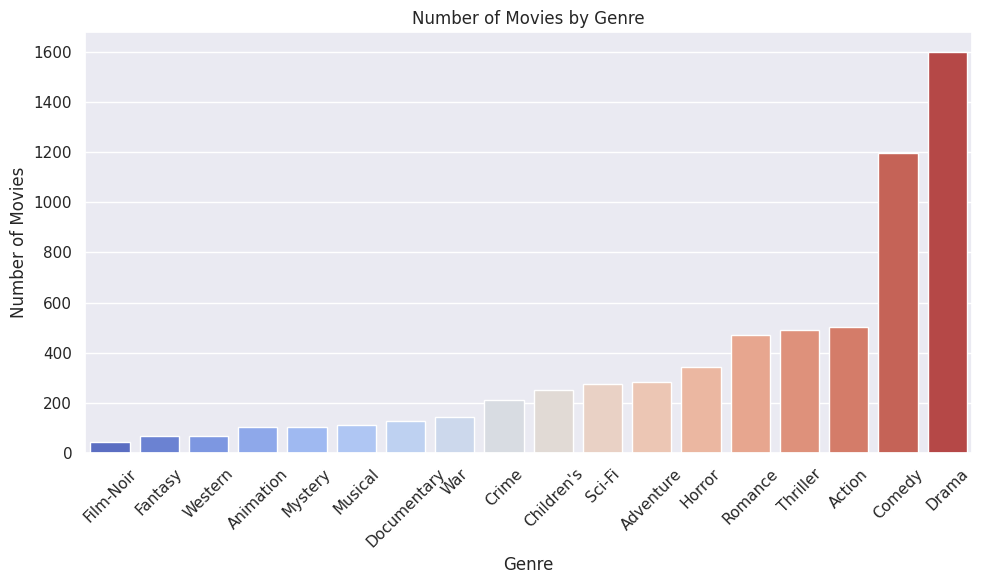

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Genre', y='Count', data=genre_counts, palette='coolwarm')
plt.title('Number of Movies by Genre')
plt.ylabel('Number of Movies')
plt.xlabel('Genre')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

1. Tổng quan về xu hướng
    - Drama và Comedy là hai thể loại phim nổi bật nhất:
        + Thể loại Drama đứng ở vị trí đầu với số lượng phim lớn nhất khoảng gần 1600 phim (1598), cho thấy sự yêu thích của mọi người với các bộ phim tập trung vào yếu tố cảm xúc và câu chuyện con người.
        + Comedy đứng thứ hai với khoảng 1200 phim, thể hiện sự hấp dẫn của các bộ phim mang tính giải trí, hài hước.
        + Sự chênh lệch lớn giữa số lượng phim ở mỗi thể loại phản ánh rằng là ngành công nghiệp điện ảnh sẽ tập trung nhiều vào các thể loại mang lại lợi nhuận cao.
2. Phân khúc giữa các thể loại
    - Thể loại tầm trung:
        + Những thể loại như Action, Thriller, Romance, và Horror có số lượng phim dao động từ 300–500.
        + Những thể loại này thường phục vụ một nhóm đối tượng khán giả cụ thể, ví dụ:
            - Action và Thriller: Những người thích cảm giác mạnh, kịch tính.
            - Romance: Phục vụ khán giả yêu thích các câu chuyện tình cảm.
            - Horror: Hấp dẫn khán giả yêu thích sự rùng rợn và hồi hộp.
    - Thể loại ít phổ biến:
        + Các thể loại như Film-Noir, Fantasy, và Western có số lượng phim rất thấp, chỉ khoảng 40–100 phim.
        + Nguyên nhân có thể do những thể loại này thuộc về thời kỳ hoặc đối tượng khán giả cụ thể, ví dụ như:
        + Film-Noir: Phổ biến hơn vào giữa thế kỷ 20(từ những năm 1940 - 1960) - thời điểm xảy ra nhiều sự kiện chiến tranh trên thế giới.
        + Western: Mang tính địa phương hóa (chủ yếu phổ biến ở Mỹ) và dễ bị giảm sức hút theo thời gian.
        + Fantasy: Khá kén khán giả trong thời kỳ trước.


In [ ]:
sorted_years = sorted(df_movies['release_year'].unique())
print(sorted_years)

[np.int64(1919), np.int64(1920), np.int64(1921), np.int64(1922), np.int64(1923), np.int64(1925), np.int64(1926), np.int64(1927), np.int64(1928), np.int64(1929), np.int64(1930), np.int64(1931), np.int64(1932), np.int64(1933), np.int64(1934), np.int64(1935), np.int64(1936), np.int64(1937), np.int64(1938), np.int64(1939), np.int64(1940), np.int64(1941), np.int64(1942), np.int64(1943), np.int64(1944), np.int64(1945), np.int64(1946), np.int64(1947), np.int64(1948), np.int64(1949), np.int64(1950), np.int64(1951), np.int64(1952), np.int64(1953), np.int64(1954), np.int64(1955), np.int64(1956), np.int64(1957), np.int64(1958), np.int64(1959), np.int64(1960), np.int64(1961), np.int64(1962), np.int64(1963), np.int64(1964), np.int64(1965), np.int64(1966), np.int64(1967), np.int64(1968), np.int64(1969), np.int64(1970), np.int64(1971), np.int64(1972), np.int64(1973), np.int64(1974), np.int64(1975), np.int64(1976), np.int64(1977), np.int64(1978), np.int64(1979), np.int64(1980), np.int64(1981), np.int6

##**Rating Data**

In [ ]:
df_ratings

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


In [ ]:
df_ratings.to_csv('df_ratings.csv', index=False)

In [ ]:
df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype
---  ------     --------------    -----
 0   user_id    1000209 non-null  int64
 1   movie_id   1000209 non-null  int64
 2   rating     1000209 non-null  int64
 3   timestamp  1000209 non-null  int64
dtypes: int64(4)
memory usage: 30.5 MB


In [ ]:
# Tính số lượng đánh giá của mỗi người dùng
user_rating_counts = df_ratings.groupby('user_id').size().reset_index(name='ReviewCount')

# Người có nhiều đánh giá nhất
most_reviews = user_rating_counts[user_rating_counts['ReviewCount'] == user_rating_counts['ReviewCount'].max()]

# Người có ít đánh giá nhất
least_reviews = user_rating_counts[user_rating_counts['ReviewCount'] == user_rating_counts['ReviewCount'].min()]

print("Người có nhiều đánh giá nhất:")
print(most_reviews)

print("\nNgười có ít đánh giá nhất:")
print(least_reviews)


Người có nhiều đánh giá nhất:
      user_id  ReviewCount
4168     4169         2314

Người có ít đánh giá nhất:
      user_id  ReviewCount
97         98           20
159       160           20
216       217           20
249       250           20
310       311           20
...       ...          ...
5532     5533           20
5724     5725           20
5827     5828           20
5903     5904           20
6037     6038           20

[86 rows x 2 columns]


In [ ]:
# Tính tứ phân vị
quartiles = user_rating_counts['ReviewCount'].quantile([0.25, 0.5, 0.75])

print("Tứ phân vị số lượt đánh giá:")
print(quartiles)

user_rating_counts['ReviewCount'].describe()


Tứ phân vị số lượt đánh giá:
0.25     44.0
0.50     96.0
0.75    208.0
Name: ReviewCount, dtype: float64


,ReviewCount
count,6040.000000
mean,165.597517
std,192.747029
min,20.000000
25%,44.000000
50%,96.000000
75%,208.000000
max,2314.000000


In [ ]:
df_ratings[df_ratings['user_id'] == 2]

,user_id,movie_id,rating,timestamp
53,2,1357,5,978298709
54,2,3068,4,978299000
55,2,1537,4,978299620
56,2,647,3,978299351
57,2,2194,4,978299297
...,...,...,...,...
177,2,356,5,978299686
178,2,1245,2,978299200
179,2,1246,5,978299418
180,2,3893,1,978299535


In [ ]:

# Chuyển đổi timestamp thành datetime
df_ratings['timestamp'] = df_ratings['timestamp'].apply(datetime.fromtimestamp)

# Trích xuất các thông tin từ timestamp
df_ratings['year'] = df_ratings['timestamp'].dt.year
df_ratings['month'] = df_ratings['timestamp'].dt.month
df_ratings['date'] = df_ratings['timestamp'].dt.date
df_ratings['time'] = df_ratings['timestamp'].dt.time  # Giờ
df_ratings['day_of_week'] = df_ratings['timestamp'].dt.day_name()  # Tên ngày (Monday, Tuesday, ...)
df_ratings['hour'] = df_ratings['timestamp'].dt.hour  # Giờ trong ngày (0-23)

# Sắp xếp theo timestamp và reset lại chỉ số
df_ratings = df_ratings.sort_values('timestamp').reset_index(drop=True)
df_ratings = df_ratings.drop(columns=['timestamp'])

In [ ]:
df_ratings

,user_id,movie_id,rating,year,month,date,time,day_of_week,hour
0,6040,858,4,2000,4,2000-04-25,23:05:32,Tuesday,23
1,6040,2384,4,2000,4,2000-04-25,23:05:54,Tuesday,23
2,6040,593,5,2000,4,2000-04-25,23:05:54,Tuesday,23
3,6040,1961,4,2000,4,2000-04-25,23:06:17,Tuesday,23
4,6040,2019,5,2000,4,2000-04-25,23:06:17,Tuesday,23
...,...,...,...,...,...,...,...,...,...
1000204,4958,2399,1,2003,2,2003-02-28,17:45:38,Friday,17
1000205,4958,1407,5,2003,2,2003-02-28,17:47:23,Friday,17
1000206,4958,3264,4,2003,2,2003-02-28,17:49:08,Friday,17
1000207,4958,2634,3,2003,2,2003-02-28,17:49:08,Friday,17


In [ ]:
print('Average rating:', round(df_ratings['rating'].mean(), 2))
print('Frequency of each rating value:')
print(df_ratings['rating'].value_counts())

Average rating: 3.58
Frequency of each rating value:
rating
4    348971
3    261197
5    226310
2    107557
1     56174
Name: count, dtype: int64


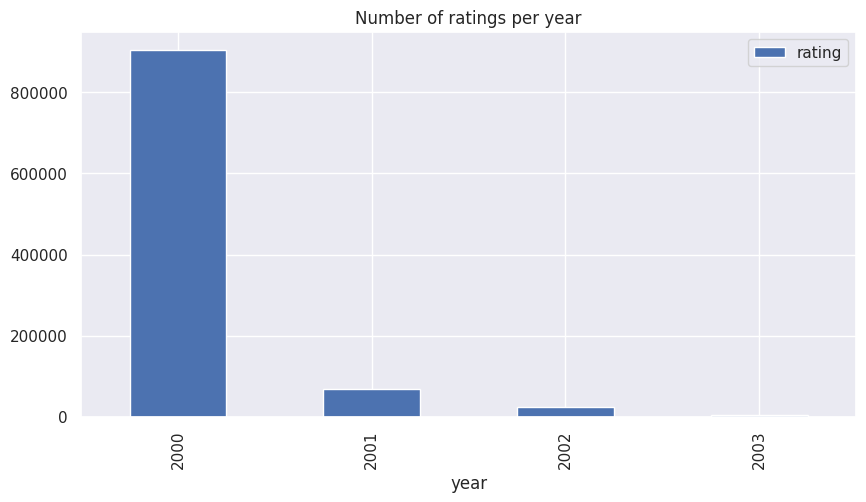

In [ ]:
df_ratings[['year', 'rating']].groupby(['year']).count().reset_index().plot.bar(x='year', y='rating', title='Number of ratings per year', figsize=(10, 5));

/tmp/ipython-input-595420488.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ratings_per_day = df_ratings[['day_of_week', 'rating']].groupby(['day_of_week']).count().reset_index()


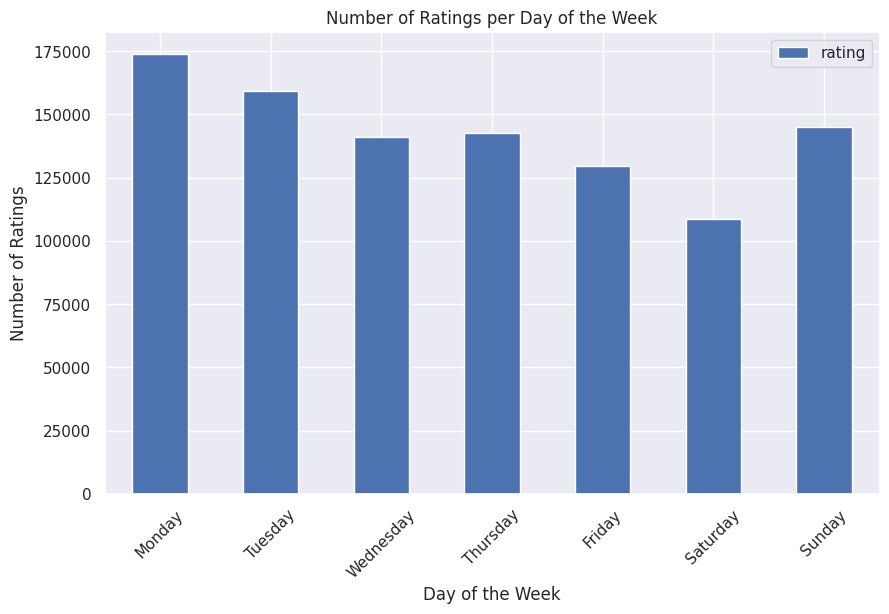

In [ ]:
# Định nghĩa thứ tự các ngày trong tuần
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Chuyển đổi cột 'day_of_week' thành kiểu Categorical với thứ tự đã định nghĩa
df_ratings['day_of_week'] = pd.Categorical(df_ratings['day_of_week'], categories=days_order, ordered=True)

# Tính toán số lượng đánh giá theo từng ngày trong tuần
ratings_per_day = df_ratings[['day_of_week', 'rating']].groupby(['day_of_week']).count().reset_index()

# Vẽ biểu đồ
ratings_per_day.plot.bar(x='day_of_week', y='rating', title='Number of Ratings per Day of the Week', figsize=(10, 6))
plt.xlabel('Day of the Week')
plt.ylabel('Number of Ratings')
plt.xticks(rotation=45)
plt.show()

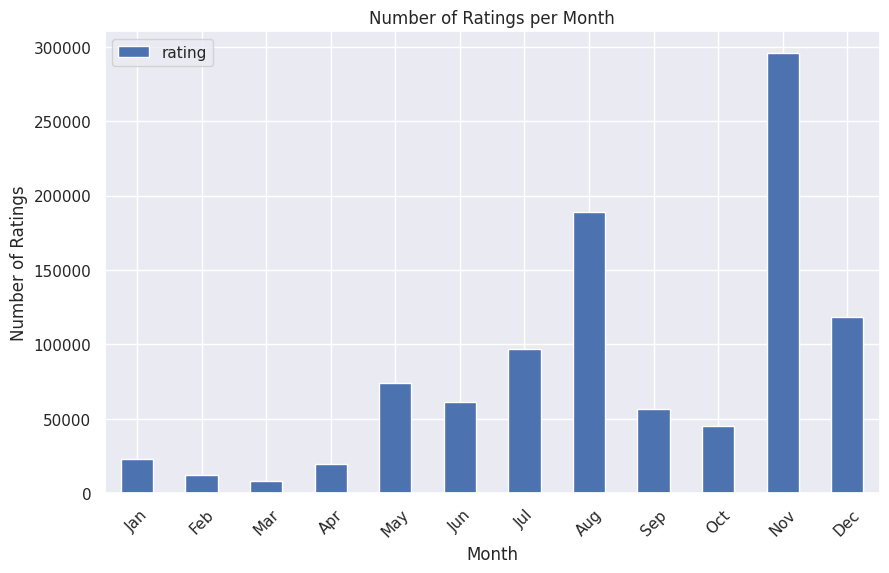

In [ ]:
df_ratings[['month', 'rating']].groupby(['month']).count().reset_index().plot.bar(x='month', y='rating', title='Number of Ratings per Month', figsize=(10, 6))
plt.title('Number of Ratings per Month')
plt.xlabel('Month')
plt.ylabel('Number of Ratings')
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.show()


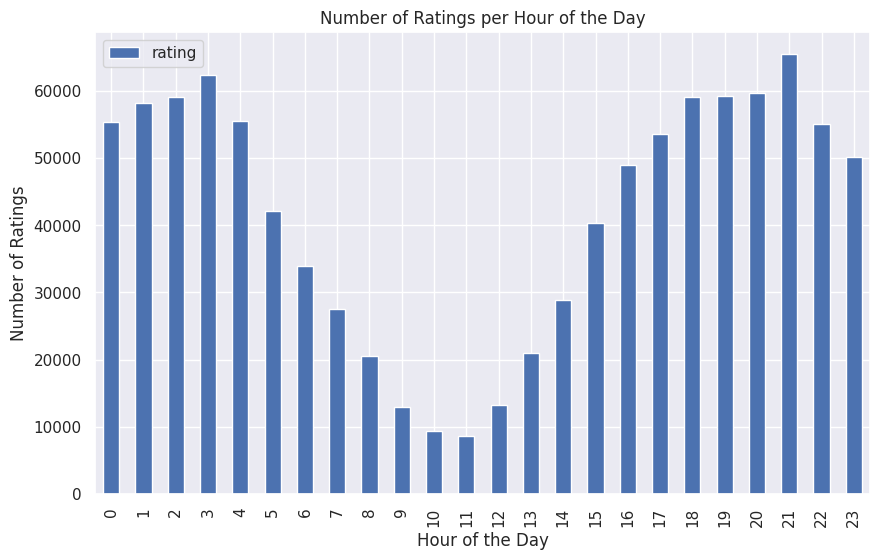

In [ ]:
df_ratings[['hour', 'rating']].groupby(['hour']).count().reset_index().plot.bar(x='hour', y='rating', title='Number of Ratings per Hour', figsize=(10, 6))
plt.title('Number of Ratings per Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Ratings')
plt.show()


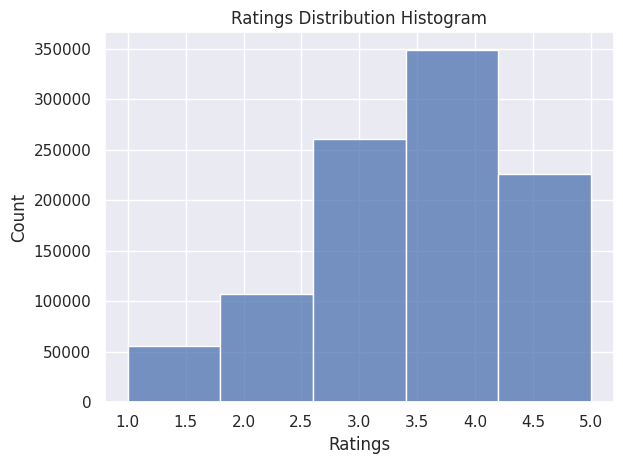

In [ ]:
sns.histplot(df_ratings['rating'], bins=5, kde=False)
plt.title('Ratings Distribution Histogram')
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

- Dữ liệu về đánh giá của người dùng được lấy từ mốc tháng 4/2000 - tháng 2/2003.
- Điểm đánh giá trung bình là khoảng 3,6 và giá trị đánh giá phổ biến nhất là 4.
- Phần lớn các đánh giá của người dùng tập trung giao động từ 3 - 5 sao, điều này cho thấy khán giả đánh giá khá là rộng lượng.
- Điểm đánh giá tối đa thường là 4 sao.





##**User Data**

In [ ]:
df_users = pd.read_csv(user_file, sep='::', header=None, names=['user_id', 'gender', 'age', 'occupation', 'zipcode'], encoding='latin1', engine='python')

In [ ]:
df_users

,user_id,gender,age,occupation,zipcode
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455
...,...,...,...,...,...
6035,6036,F,25,15,32603
6036,6037,F,45,1,76006
6037,6038,F,56,1,14706
6038,6039,F,45,0,01060


In [ ]:
age_group_dict = {
    1:  "Under 18",
    18:  "18-24",
    25:  "25-34",
    35:  "35-44",
    45:  "45-49",
    50:  "50-55",
    56:  "56+"
}

In [ ]:
occupation_dict = {
    0:  "other or not specified",
    1:  "academic/educator",
    2:  "artist",
    3:  "clerical/admin",
    4:  "college/grad student",
    5:  "customer service",
    6:  "doctor/health care",
    7:  "executive/managerial",
    8:  "farmer",
    9:  "homemaker",
    10:  "K-12 student",
    11:  "lawyer",
    12:  "programmer",
    13:  "retired",
    14:  "sales/marketing",
    15:  "scientist",
    16:  "self-employed",
    17:  "technician/engineer",
    18:  "tradesman/craftsman",
    19:  "unemployed",
    20:  "writer"
}

gender
M    4331
F    1709
Name: count, dtype: int64


<Axes: xlabel='gender', ylabel='count'>

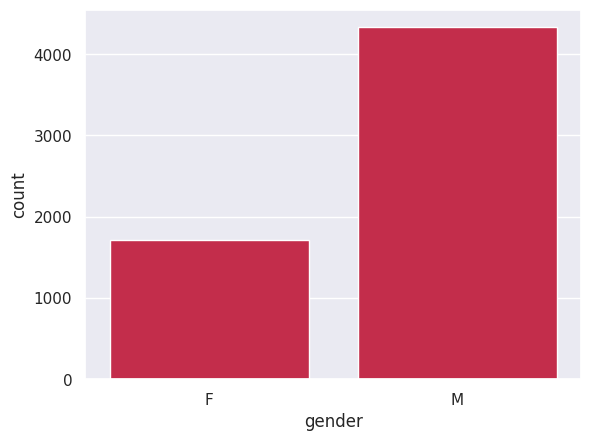

In [ ]:
print(df_users['gender'].value_counts())
sns.countplot(x='gender', data = df_users, color = 'crimson')

In [ ]:
df_users['user_id'].duplicated().sum()

np.int64(0)

In [ ]:
df_users['age'] = df_users['age'].map(age_group_dict)

age_counts = df_users['age'].value_counts().reset_index()
age_counts.columns = ['age', 'count']

In [ ]:
print(df_users['age'].value_counts())

age
25-34       2096
35-44       1193
18-24       1103
45-49        550
50-55        496
56+          380
Under 18     222
Name: count, dtype: int64


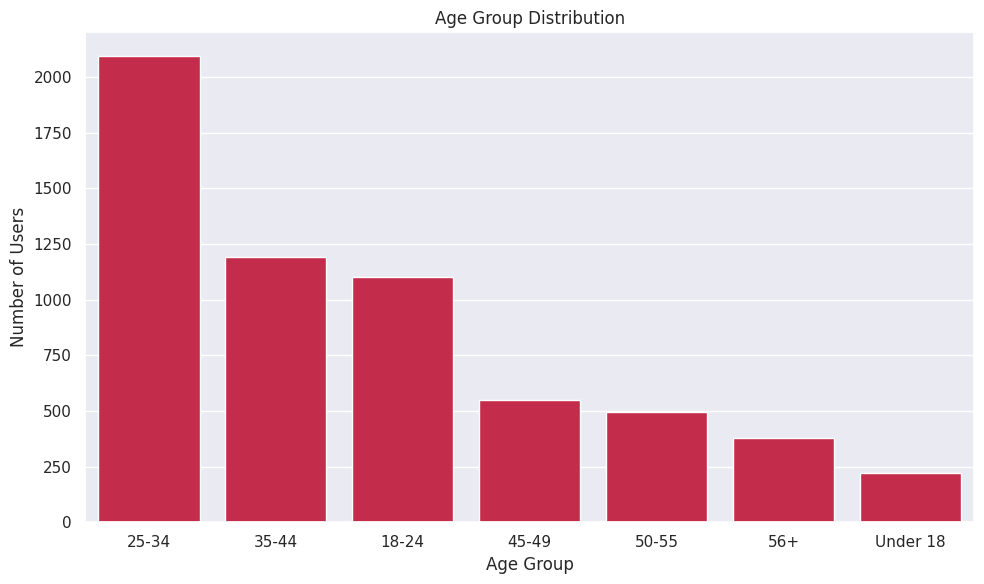

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x = 'age', y = 'count', data = age_counts, color = 'crimson')
plt.title('Age Group Distribution')
plt.xlabel('Age Group')
plt.ylabel('Number of Users')
plt.tight_layout()
plt.show()

**Nhận xét:**


In [ ]:
# Ánh xạ occupation thành tên rõ ràng
df_users['occupation'] = df_users['occupation'].map(occupation_dict)

# Tính số lượng người dùng theo nghề nghiệp
occupation_counts = df_users['occupation'].value_counts().reset_index()
occupation_counts.columns = ['occupation', 'count']
occupation_counts = occupation_counts.sort_values(by = 'count')

In [ ]:
df_users['occupation'].value_counts()

,count
occupation,
college/grad student,759
other or not specified,711
executive/managerial,679
academic/educator,528
technician/engineer,502
programmer,388
sales/marketing,302
writer,281
artist,267


/tmp/ipython-input-1975182299.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'occupation', y = 'count', data = occupation_counts, palette = 'rocket')


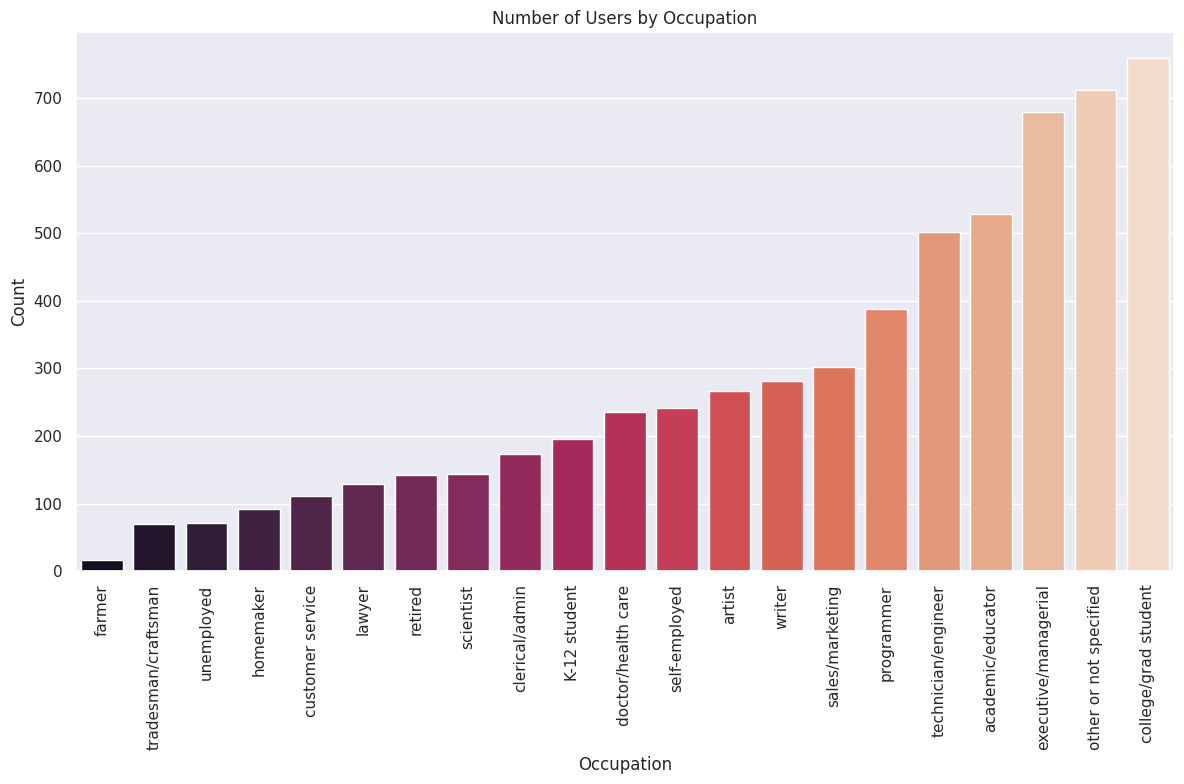

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(x = 'occupation', y = 'count', data = occupation_counts, palette = 'rocket')
plt.title('Number of Users by Occupation')
plt.ylabel('Count')
plt.xlabel('Occupation')
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

In [ ]:
df_users.to_csv('df_users.csv', index=False)

In [ ]:
# Đếm số lượng mã ZIP theo từng loại
zipcode_counts = {
    '5 digits': df_users['zipcode'].str.match(r'^\d{5}$', na=False).sum(),
    '9 digits': df_users['zipcode'].str.match(r'^\d{5}-\d{4}$', na=False).sum(),
    '6 digits': df_users['zipcode'].str.match(r'^\d{6}$', na=False).sum()
}

# In kết quả
print(zipcode_counts)
print(sum(zipcode_counts.values()))

# Lọc các mã ZIP không khớp với bất kỳ định dạng nào
invalid_zipcodes = df_users[
    ~df_users['zipcode'].str.match(r'^\d{5}$|^\d{5}-\d{4}$|^\d{6}$', na=False)
]
invalid_zipcodes

{'5 digits': np.int64(5959), '9 digits': np.int64(66), '6 digits': np.int64(11)}
6036


,user_id,gender,age,occupation,zipcode
540,541,F,18-24,college/grad student,5849574
1258,1259,M,35-44,executive/managerial,2020010
4537,4538,M,25-34,programmer,0956456
5099,5100,M,50-55,doctor/health care,193122042


In [ ]:
# Lọc ra các mã ZIP có dạng ZIP+4 (có dấu gạch ngang)
zipcode_plus4 = df_users[df_users['zipcode'].str.contains('-')]
zipcode_plus4

,user_id,gender,age,occupation,zipcode
160,161,M,45-49,self-employed,98107-2117
232,233,F,45-49,writer,37919-4204
292,293,M,56+,academic/educator,55337-4056
457,458,M,50-55,self-employed,55405-2546
505,506,M,25-34,self-employed,55103-1006
...,...,...,...,...,...
5664,5665,M,18-24,college/grad student,10461-1301
5681,5682,M,18-24,other or not specified,23455-4959
5924,5925,F,25-34,other or not specified,90035-4444
5966,5967,M,50-55,self-employed,73069-5429


In [ ]:
# Cắt bỏ phần sau dấu gạch ngang (bao gồm cả dấu gạch ngang)
df_users['zipcode'] = df_users['zipcode'].str.split('-').str[0]

In [ ]:
# import requests
# from bs4 import BeautifulSoup
# import pandas as pd
# from concurrent.futures import ThreadPoolExecutor
# from tqdm import tqdm  # Import tqdm

# # Hàm thu thập thông tin từ trang web
# def get_location_from_web(zipcode):
#     url = f'https://simplemaps.com/us-zips/{zipcode}'
#     response = requests.get(url)
#     if response.status_code == 200:
#         soup = BeautifulSoup(response.content, 'html.parser')
#         table = soup.find('table', class_='table table-condensed')
#         if table:
#             rows = table.find_all('tr')
#             data = {}
#             keys_needed = ['City', 'State', 'Latitude', 'Longitude']
#             for row in rows:
#                 columns = row.find_all('td')
#                 if len(columns) == 2:
#                     key = columns[0].get_text(strip=True)
#                     value = columns[1].get_text(strip=True)
#                     if key in keys_needed:
#                         data[key] = value
#             return data
#     return {"City": None, "State": None, "Latitude": None, "Longitude": None}

# # Hàm thu thập thông tin cho tất cả mã zip duy nhất bằng đa luồng và hiển thị thanh tiến trình
# def add_location_info(df):
#     # Lọc ra các mã zip duy nhất
#     unique_zipcodes = df['zipcode'].unique()

#     # Sử dụng ThreadPoolExecutor và tqdm để theo dõi tiến trình
#     with ThreadPoolExecutor(max_workers=5) as executor:
#         # tqdm sẽ bao bọc list(executor.map(...)) để hiển thị thanh tiến trình
#         location_data = list(tqdm(executor.map(get_location_from_web, unique_zipcodes), total=len(unique_zipcodes), desc="Collecting data"))

#     # Chuyển kết quả thành các cột riêng biệt
#     location_df = pd.DataFrame(location_data, index=unique_zipcodes)

#     # Map thông tin vào DataFrame chính dựa trên mã zip
#     df = df.merge(location_df, left_on='zipcode', right_index=True, how='left')
#     return df

# # Thêm thông tin vị trí vào df_users
# df_users = add_location_info(df_users)

# print(df_users)


In [ ]:
import requests
import pandas as pd
from concurrent.futures import ThreadPoolExecutor, as_completed
from tqdm import tqdm

# Hàm lấy thông tin từ API
def get_location(zipcode):
    url = f"http://api.zippopotam.us/us/{zipcode}"
    try:
        response = requests.get(url)
        if response.status_code == 200:
            data = response.json()
            return {
                "city": data['places'][0]['place name'],
                "state": data['places'][0]['state'],
                "latitude": data['places'][0]['latitude'],
                "longitude": data['places'][0]['longitude']
            }
        else:
            return {"city": None, "state": None, "latitude": None, "longitude": None}
    except Exception as e:
        return {"city": None, "state": None, "latitude": None, "longitude": None}

# Hàm thu thập dữ liệu với một thanh tiến trình duy nhất
def fetch_locations(zipcodes):
    results = []
    with ThreadPoolExecutor(max_workers=10) as executor:
        future_to_zipcode = {executor.submit(get_location, z): z for z in zipcodes}

        # Hiển thị một thanh tiến trình duy nhất
        with tqdm(total=len(zipcodes), desc="Fetching locations") as pbar:
            for future in as_completed(future_to_zipcode):
                try:
                    results.append(future.result())
                except Exception as e:
                    # Bỏ qua lỗi và tiếp tục
                    pass
                finally:
                    # Cập nhật thanh tiến trình
                    pbar.update(1)
    return results

zipcodes_to_fetch = df_users['zipcode'].unique()

location_data = fetch_locations(zipcodes_to_fetch)

# Tạo DataFrame từ kết quả
location_df = pd.DataFrame(location_data, index=zipcodes_to_fetch)

# Map thông tin vào DataFrame chính
df_users = df_users.merge(location_df, left_on='zipcode', right_index=True, how='left')


Fetching locations: 100%|██████████| 3403/3403 [00:10<00:00, 329.36it/s]


In [ ]:
df_users

,user_id,gender,age,occupation,zipcode,city,state,latitude,longitude
0,1,F,Under 18,K-12 student,48067,Springfield Gardens,New York,40.6645,-73.7559
1,2,M,56+,self-employed,70072,Sonora,California,37.9957,-120.3368
2,3,M,25-34,scientist,55117,Marrero,Louisiana,29.8598,-90.1105
3,4,M,45-49,executive/managerial,02460,West Buxton,Maine,43.6428,-70.5376
4,5,M,25-34,writer,55455,Saint Paul,Minnesota,44.9995,-93.0969
...,...,...,...,...,...,...,...,...,...
6035,6036,F,25-34,scientist,32603,Gainesville,Florida,29.6515,-82.3493
6036,6037,F,45-49,academic/educator,76006,Arlington,Texas,32.7785,-97.0834
6037,6038,F,56+,academic/educator,14706,Allegany,New York,42.0918,-78.4999
6038,6039,F,45-49,other or not specified,01060,Brookfield,Illinois,41.8217,-87.8492


In [ ]:
print(df_users.isnull().sum())

user_id         0
gender          0
age             0
occupation      0
zipcode         0
city          101
state         101
latitude      101
longitude     101
dtype: int64


In [ ]:
merged_df = pd.merge(pd.merge(df_ratings, df_users, on='user_id'), df_movies, on='movie_id')
merged_df

,user_id,movie_id,rating,year,month,date,time,day_of_week,hour,gender,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,6040,858,4,2000,4,2000-04-25,23:05:32,Tuesday,23,M,...,0,0,0,0,0,0,0,0,0,0
1,6040,2384,4,2000,4,2000-04-25,23:05:54,Tuesday,23,M,...,0,0,0,0,0,0,0,0,0,0
2,6040,593,5,2000,4,2000-04-25,23:05:54,Tuesday,23,M,...,0,0,0,0,0,0,0,1,0,0
3,6040,1961,4,2000,4,2000-04-25,23:06:17,Tuesday,23,M,...,0,0,0,0,0,0,0,0,0,0
4,6040,2019,5,2000,4,2000-04-25,23:06:17,Tuesday,23,M,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
998738,4958,2399,1,2003,2,2003-02-28,17:45:38,Friday,17,M,...,1,0,0,0,0,0,0,0,0,0
998739,4958,1407,5,2003,2,2003-02-28,17:47:23,Friday,17,M,...,0,0,1,0,0,0,0,1,0,0
998740,4958,3264,4,2003,2,2003-02-28,17:49:08,Friday,17,M,...,0,0,1,0,0,0,0,0,0,0
998741,4958,2634,3,2003,2,2003-02-28,17:49:08,Friday,17,M,...,0,0,1,0,0,0,0,0,0,0


In [ ]:
print(merged_df.columns)

Index(['user_id', 'movie_id', 'rating', 'year', 'month', 'date', 'time',
       'day_of_week', 'hour', 'gender', 'age', 'occupation', 'zipcode', 'city',
       'state', 'latitude', 'longitude', 'imdb_id', 'title', 'genre',
       'release_year', 'type', 'Action', 'Adventure', 'Animation',
       'Children's', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
       'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi',
       'Thriller', 'War', 'Western'],
      dtype='object')


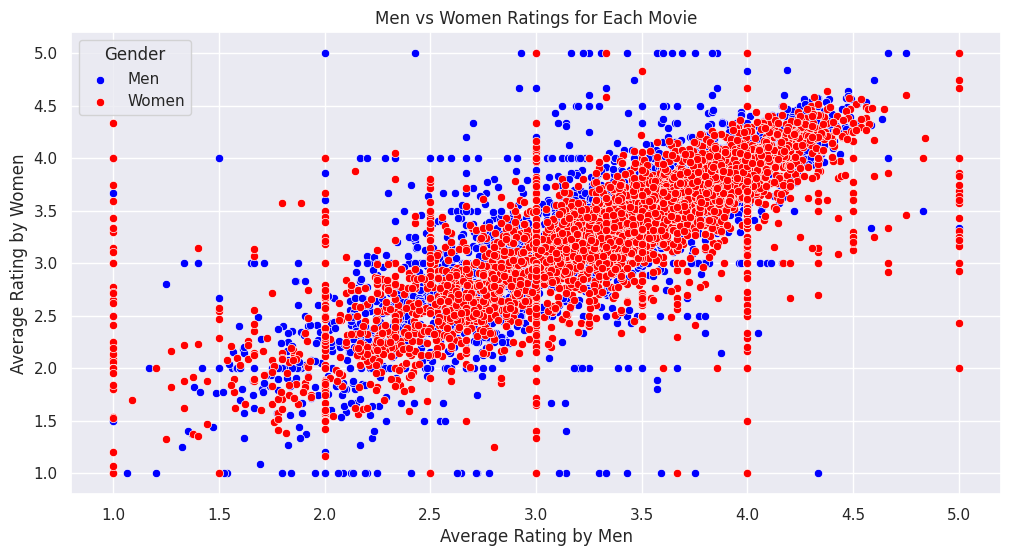

In [ ]:
# Tính trung bình đánh giá cho từng bộ phim theo giới tính
avg_rating_gender = merged_df.groupby(['movie_id', 'gender'])['rating'].mean().unstack()

# Vẽ scatter plot giữa điểm đánh giá trung bình của nam và nữ cho mọi bộ phim
plt.figure(figsize=(12, 6))

# Vẽ điểm cho nam (M) với màu xanh dương
sns.scatterplot(x=avg_rating_gender['M'], y=avg_rating_gender['F'], color='blue', label='Men')

# Vẽ điểm cho nữ (F) với màu đỏ
sns.scatterplot(x=avg_rating_gender['F'], y=avg_rating_gender['M'], color='red', label='Women')

plt.title('Men vs Women Ratings for Each Movie')
plt.xlabel('Average Rating by Men')
plt.ylabel('Average Rating by Women')
plt.legend(title="Gender", loc='upper left')
plt.show()


Xu hướng tuyến tính cho thấy nam và nữ có xu hướng nghĩ giống nhau khi đánh giá phim, ngoại trừ một vài trường hợp đặc biệt.


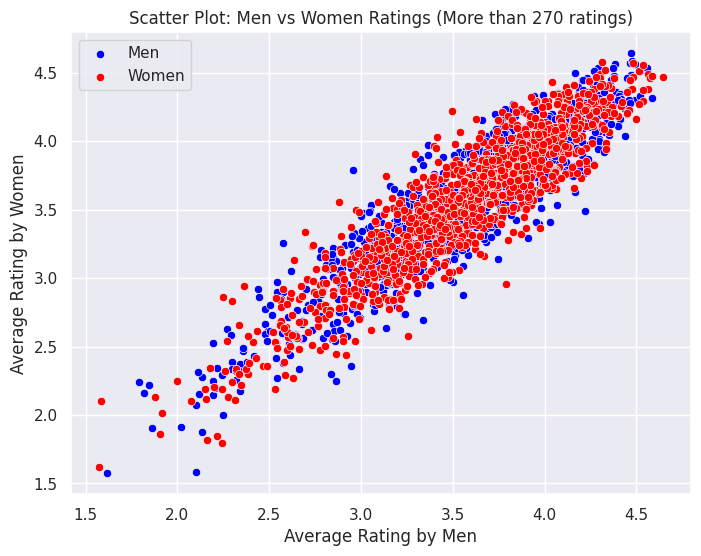

In [ ]:
# Đếm số lượt đánh giá cho mỗi bộ phim
movie_rating_counts = merged_df.groupby('movie_id')['rating'].count()

# Lọc ra những bộ phim có hơn 270 lượt đánh giá
movies_more_than_270_ratings = movie_rating_counts[movie_rating_counts > 270].index

# Lọc ra dữ liệu cho những bộ phim này
filtered_data = merged_df[merged_df['movie_id'].isin(movies_more_than_270_ratings)]

# Tính trung bình đánh giá cho từng bộ phim theo giới tính
avg_rating_gender_filtered = filtered_data.groupby(['movie_id', 'gender'])['rating'].mean().unstack()

# Vẽ Scatter Plot
plt.figure(figsize=(8, 6))

sns.scatterplot(x=avg_rating_gender_filtered['M'], y=avg_rating_gender_filtered['F'],
                color='blue', label='Men')

# Vẽ điểm cho nữ (F) với màu đỏ
sns.scatterplot(x=avg_rating_gender_filtered['F'], y=avg_rating_gender_filtered['M'],
                color='red', label='Women')

plt.title('Scatter Plot: Men vs Women Ratings (More than 270 ratings)')
plt.xlabel('Average Rating by Men')
plt.ylabel('Average Rating by Women')
plt.show()


Tương tự với biểu đồ bên trên, nhưng chỉ xét các bộ phim được đánh giá hơn 270 lần.
Kết quả cho thấy xu hướng tuyến tính tương đồng, càng củng cố nhận định rằng nam và nữ có sở thích giống nhau.

In [ ]:
print("So luong danh gia trung binh moi bo phim: ", movie_rating_counts.mean())

# Tính hệ số tương quan giữa điểm đánh giá của nam và nữ
correlation = avg_rating_gender_filtered.corr()
print(f"Correlation coefficient between male and female ratings: \n{correlation}")


So luong danh gia trung binh moi bo phim:  270.07652785289343
Correlation coefficient between male and female ratings: 
gender         F         M
gender                    
F       1.000000  0.915694
M       0.915694  1.000000


- Điểm đánh giá của nam và nữ có hệ số tương quan xấp xỉ 0.92, rất cao, cho thấy sự tương đồng lớn.
- Điều này cho biết nếu một nam giới thích một bộ phim, thì khả năng cao nữ giới cũng thích bộ phim đó.
+ Tuy nhiên, nếu phát triển mô hình dự đoán dựa trên dữ liệu này, có thể gặp vấn đề đa cộng tuyến (xảy ra khi các biến độc lập trong một mô hình hồi quy tuyến tính có mối quan hệ chặt chẽ với nhau. Khi đó, các biến độc lập không hoàn toàn độc lập, mà có sự tương quan mạnh mẽ, dẫn đến việc khó xác định được sự đóng góp  riêng biệt của từng biến vào mô hình.)

In [ ]:
mean_ratings = merged_df.pivot_table(values='rating',
                              index=['genre', 'age'],
                              columns='gender',
                              aggfunc='mean')

# Tính sự khác biệt giữa đánh giá của nam (M) và nữ (F)
mean_ratings['Difference'] = mean_ratings['F'] - mean_ratings['M']

# Sắp xếp tăng dần theo Difference
asc = mean_ratings.sort_values(by="Difference", ascending=False)

# Sắp xếp giảm dần theo Difference
dsc = mean_ratings.sort_values(by="Difference", ascending=True)

# Lọc các giá trị có Difference = 0
zero = mean_ratings[mean_ratings["Difference"] == 0]

In [ ]:
asc.head(5) # Các thể loại mà nữ yêu thích hơn nam

,gender,F,M,Difference
genre,age,,,
Comedy|Horror|Sci-Fi,50-55,5.00,1.500000,3.500000
Romance|Western,18-24,5.00,1.666667,3.333333
Adventure|Musical|Romance,18-24,4.25,1.000000,3.250000
Children's|Fantasy,35-44,4.00,1.000000,3.000000
Documentary|War,56+,5.00,2.000000,3.000000


In [ ]:
dsc.head(5)

,gender,F,M,Difference
genre,age,,,
Horror|Mystery,Under 18,1.0,5.000000,-4.000000
Action|Adventure|Comedy|Horror,Under 18,1.0,4.214286,-3.214286
Romance|Western,25-34,1.0,4.000000,-3.000000
Drama|Musical|War,50-55,1.0,4.000000,-3.000000
Action|Comedy|War,Under 18,1.0,3.812500,-2.812500


**Nhận xét:**
- Các thể loại có sự khác biệt lớn giữa Nam và Nữ:
    + Comedy|Horror|Sci-Fi: Bảng chỉ ra rằng người lớn tuổi (50-55 tuổi) thích thể loại này, đặc biệt là phụ nữ, mặc dù điều này có vẻ trái ngược với nhận thức thông thường (thường nghĩ người lớn tuổi không thích phim khoa học viễn tưởng hoặc kinh dị).
    + Romance|Western hoặc Adventure|Musical|Romance: Những thể loại này thường được phụ nữ đánh giá cao hơn nam giới, đặc biệt trong độ tuổi 18-24 (Học sinh, sinh viên).
- Sự khác biệt lớn giữa hai giới giúp xác định các thể loại đặc trưng được yêu thích bởi từng nhóm tuổi và giới tính.
- Điều này có thể được ứng dụng trong việc cá nhân hóa hoặc phân nhóm khách hàng để đưa ra đề xuất phù hợp:
    + Ví dụ: Các chiến dịch quảng cáo có thể tập trung vào nhóm phụ nữ lớn tuổi khi tiếp thị phim hài pha khoa học viễn tưởng hoặc phim lãng mạn.

In [ ]:
zero.head(5)

,gender,F,M,Difference
genre,age,,,
Action|Adventure|Romance|War,Under 18,4.333333,4.333333,0.0
Action|Adventure|Western,Under 18,3.000000,3.000000,0.0
Action|Comedy|Musical|Sci-Fi,56+,2.500000,2.500000,0.0
Action|Drama|Mystery|Romance|Thriller,56+,4.000000,4.000000,0.0
Action|Western,Under 18,4.000000,4.000000,0.0


- Các thể loại được đánh giá giống nhau bởi hai giới chủ yếu thuộc hai nhóm tuổi:
    + Under 18: Nhóm trẻ thường yêu thích các thể loại mang tính phiêu lưu, hành động, và lãng mạn (Action|Adventure|Romance|War|Western)
    + 56+: Người lớn tuổi thích các thể loại bí ẩn, chính kịch, hoặc khoa học viễn tưởng (Action|Drama|Mystery|Romance|Thriller|Comedy|Musical|Sci-Fi)

In [ ]:
zero.reset_index(level=["age"],inplace=True)
zero[zero["age"]=="Under 18"]

gender,age,F,M,Difference
genre,,,,
Action|Adventure|Romance|War,Under 18,4.333333,4.333333,0.0
Action|Adventure|Western,Under 18,3.000000,3.000000,0.0
Action|Western,Under 18,4.000000,4.000000,0.0
Adventure|Drama|Romance,Under 18,4.000000,4.000000,0.0
Documentary|Drama,Under 18,4.000000,4.000000,0.0
Documentary|Musical,Under 18,3.500000,3.500000,0.0


**Nhận xét:**
- Những thể loại như Drama, Musical, Western, Romance và Documentary nhận được sự đồng thuận lớn giữa hai giới, đặc biệt ở nhóm tuổi dưới 18 tuổi (Under 18).
- Nhóm tuổi này thường yêu thích các thể loại Action (Hành động), Adventure (Phiêu lưu), và Drama (Chính kịch), cho thấy sự thống nhất cao trong sở thích.
- Documentary: Đây là thể loại mà cả Nam và Nữ dưới 18 tuổi đều yêu thích, cho thấy sự tò mò, muốn khám phá, học hỏi và tìm tòi ở lứa tuổi này.

In [ ]:
mean_ratings = merged_df.pivot_table(values='rating', index=['occupation'], columns='gender', aggfunc='mean')
mean_ratings["Difference"] = (mean_ratings["F"]- mean_ratings["M"])
mean_ratings

gender,F,M,Difference
occupation,,,
K-12 student,3.573584,3.515532,0.058053
academic/educator,3.585175,3.572292,0.012883
artist,3.557109,3.581634,-0.024525
clerical/admin,3.687683,3.630644,0.057040
college/grad student,3.547989,3.533558,0.014430
customer service,3.584359,3.526765,0.057594
doctor/health care,3.691043,3.642497,0.048546
executive/managerial,3.669082,3.585835,0.083247
farmer,3.367508,3.498549,-0.131041


**Nhận xét:**

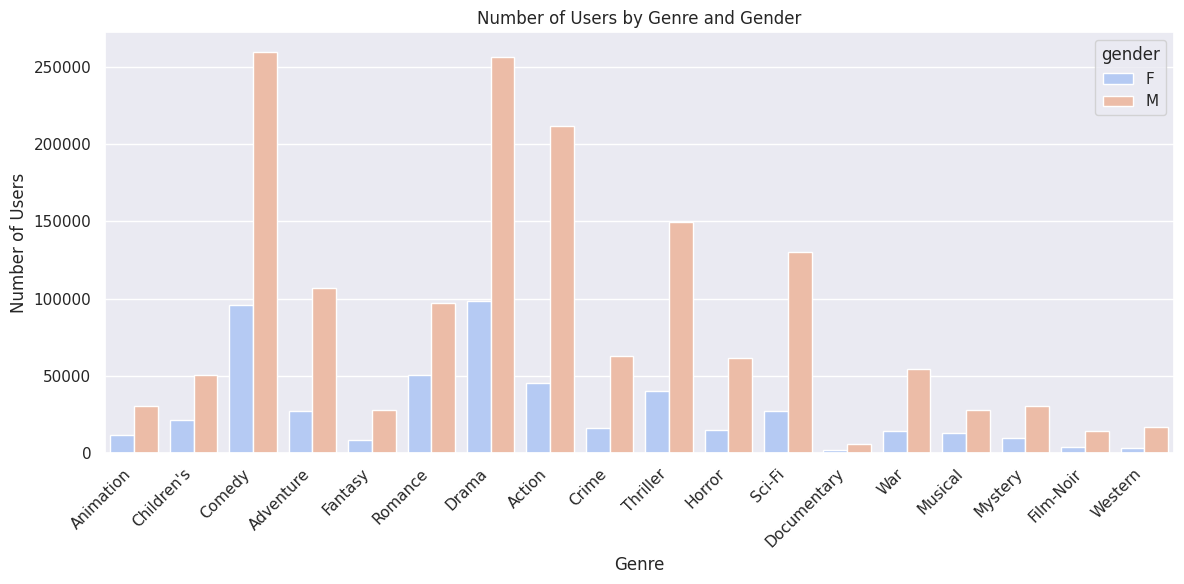

In [ ]:
gender_genre_df = merged_df.groupby('gender')[genres_unique].sum().reset_index()

gender_genre_melted = gender_genre_df.melt(id_vars='gender',
                                           var_name='Genre',
                                           value_name='Number of Users')

# Vẽ biểu đồ cột với seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='Genre', y='Number of Users', hue='gender', data=gender_genre_melted, palette='coolwarm')
plt.title("Number of Users by Genre and Gender")
plt.xlabel("Genre")
plt.ylabel("Number of Users")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
top_movies = merged_df.groupby(['movie_id', 'title', 'genre'])['rating'].count().reset_index()
top_movies.columns = ['movie_id', 'title', 'genre', 'num_ratings']
top_movies = top_movies.sort_values(by='num_ratings', ascending=False)

# Lấy ra top 10 bộ phim được đánh giá nhiều nhất = phổ biến nhất
top_10_movies = top_movies.head(10)

# Hiển thị kết quả
top_10_movies

,movie_id,title,genre,num_ratings
2647,2858,American Beauty,Comedy|Drama,3428
253,260,Star Wars: Episode IV - A New Hope,Action|Adventure|Fantasy|Sci-Fi,2991
1105,1196,Star Wars: Episode V - The Empire Strikes Back,Action|Adventure|Drama|Sci-Fi|War,2990
1119,1210,Star Wars: Episode VI - Return of the Jedi,Action|Adventure|Romance|Sci-Fi|War,2883
466,480,Jurassic Park,Action|Adventure|Sci-Fi,2672
1846,2028,Saving Private Ryan,Action|Drama|War,2653
575,589,Terminator 2: Judgment Day,Action|Sci-Fi|Thriller,2649
2371,2571,The Matrix,Action|Sci-Fi|Thriller,2590
1177,1270,Back to the Future,Comedy|Sci-Fi,2583
579,593,The Silence of the Lambs,Drama|Thriller,2578


In [ ]:
df_movies

,movie_id,imdb_id,title,genre,release_year,type,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,tt0114709,Toy Story,Animation|Children's|Comedy,1995,Movie,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,tt0113497,Jumanji,Adventure|Children's|Fantasy,1995,Movie,0,1,0,1,...,1,0,0,0,0,0,0,0,0,0
2,3,tt0113228,Grumpier Old Men,Comedy|Romance,1995,Movie,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,4,tt0114885,Waiting to Exhale,Comedy|Drama,1995,Movie,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,tt0113041,Father of the Bride Part II,Comedy,1995,Movie,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3868,3948,tt0212338,Meet the Parents,Comedy,2000,Movie,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3869,3949,tt0180093,Requiem for a Dream,Drama,2000,Movie,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3870,3950,tt0170691,Tigerland,Drama,2000,Movie,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3871,3951,tt0202641,Two Family House,Drama,2000,Movie,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### training

In [ ]:
# Cài đặt PyTorch Geometric và các thư viện phụ trợ
!pip install torch-geometric


In [ ]:
!pip install torch

In [ ]:
import torch
from torch_geometric.data import HeteroData
import torch_geometric.transforms as T
import pandas as pd

# --- SỬA LỖI: LÀM SẠCH DỮ LIỆU ---
# 1. Chỉ giữ lại những rating mà user và movie thực sự tồn tại trong danh sách gốc
valid_movie_ids = df_movies['movie_id'].unique()
valid_user_ids = df_users['user_id'].unique()

# Lọc bỏ rating rác
df_ratings_clean = df_ratings[
    (df_ratings['movie_id'].isin(valid_movie_ids)) &
    (df_ratings['user_id'].isin(valid_user_ids))
].copy()

print(f"Số lượng rating gốc: {len(df_ratings)}")
print(f"Số lượng rating sau khi lọc: {len(df_ratings_clean)}")
# ----------------------------------

# 2. Map ID sang chỉ số liên tục (0 -> N-1)
# Tạo mapping cho User ID từ danh sách user gốc
unique_user_id = pd.DataFrame(data={
    'user_id': valid_user_ids,
    'mappedID': pd.RangeIndex(len(valid_user_ids)),
})

# Tạo mapping cho Movie ID từ danh sách movie gốc
unique_movie_id = pd.DataFrame(data={
    'movie_id': valid_movie_ids,
    'mappedID': pd.RangeIndex(len(valid_movie_ids)),
})

# Merge mapping vào dataframe ratings ĐÃ ĐƯỢC LÀM SẠCH
ratings_user_id = pd.merge(df_ratings_clean['user_id'], unique_user_id,
                            left_on='user_id', right_on='user_id', how='left')
ratings_movie_id = pd.merge(df_ratings_clean['movie_id'], unique_movie_id,
                            left_on='movie_id', right_on='movie_id', how='left')

# Kiểm tra kỹ lần nữa xem có NaN không
if ratings_user_id['mappedID'].isna().any() or ratings_movie_id['mappedID'].isna().any():
    print("CẢNH BÁO: Vẫn còn giá trị NaN trong mapping! Kiểm tra lại dữ liệu.")
else:
    print("Mapping thành công, không có lỗi NaN.")

# Lấy tensor edge_index (nguồn -> đích)
edge_index_user_to_movie = torch.stack([
    torch.tensor(ratings_user_id['mappedID'].values, dtype=torch.long),
    torch.tensor(ratings_movie_id['mappedID'].values, dtype=torch.long)
], dim=0)

# 3. Khởi tạo đối tượng HeteroData
data = HeteroData()

# Thêm Node (User và Movie)
data['user'].num_nodes = len(unique_user_id)
data['movie'].num_nodes = len(unique_movie_id)

# Thêm Edge
data['user', 'rates', 'movie'].edge_index = edge_index_user_to_movie
data['user', 'rates', 'movie'].edge_label = torch.tensor(df_ratings_clean['rating'].values, dtype=torch.float)

# Thêm cạnh ngược
data = T.ToUndirected()(data)

print(data)

Số lượng rating gốc: 1000209
Số lượng rating sau khi lọc: 998743
Mapping thành công, không có lỗi NaN.
HeteroData(
  user={ num_nodes=6040 },
  movie={ num_nodes=3873 },
  (user, rates, movie)={
    edge_index=[2, 998743],
    edge_label=[998743],
  },
  (movie, rev_rates, user)={
    edge_index=[2, 998743],
    edge_label=[998743],
  }
)


In [ ]:
# Chia cạnh thành train/val/test (80/10/10)
transform = T.RandomLinkSplit(
    num_val=0.1,
    num_test=0.1,
    disjoint_train_ratio=0.3, # Tách biệt cạnh dùng để giám sát và cạnh dùng để truyền tin (message passing)
    neg_sampling_ratio=0.0,   # Bài toán hồi quy rating nên tạm thời không cần negative sampling
    add_negative_train_samples=False,
    edge_types=[('user', 'rates', 'movie')],
    rev_edge_types=[('movie', 'rev_rates', 'user')],
)

train_data, val_data, test_data = transform(data)

In [ ]:
import torch
import torch.nn.functional as F
from torch_geometric.nn import SAGEConv, to_hetero

# ==========================================
# 1. Định nghĩa Encoder (Xử lý thông tin đồ thị)
# ==========================================
class GNNEncoder(torch.nn.Module):
    def __init__(self, hidden_channels, out_channels):
        super().__init__()
        # SAGEConv giúp tổng hợp thông tin từ hàng xóm
        self.conv1 = SAGEConv((-1, -1), hidden_channels)
        self.conv2 = SAGEConv((-1, -1), out_channels)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index).relu()
        x = self.conv2(x, edge_index)
        return x

# ==========================================
# 2. Định nghĩa Model (Đã thêm Bias để giảm RMSE)
# ==========================================
class Model(torch.nn.Module):
    def __init__(self, hidden_channels, data):
        super().__init__()

        # --- A. Embedding cơ bản ---
        self.user_emb = torch.nn.Embedding(data['user'].num_nodes, hidden_channels)
        self.movie_emb = torch.nn.Embedding(data['movie'].num_nodes, hidden_channels)

        # --- B. Embedding Bias ---
        # Bias giúp mô hình học được: User dễ tính hay khó tính? Phim hay hay dở?
        self.user_bias = torch.nn.Embedding(data['user'].num_nodes, 1)
        self.movie_bias = torch.nn.Embedding(data['movie'].num_nodes, 1)

        # --- C. GNN Encoder ---
        self.gnn = GNNEncoder(hidden_channels, hidden_channels)
        # Chuyển đổi sang Hetero GNN để xử lý các loại cạnh khác nhau
        self.gnn = to_hetero(self.gnn, metadata=data.metadata(), aggr='sum')

        # --- D. Lớp dự đoán ---
        # Input là (User Vector + Movie Vector) -> Output là 1 số (Rating)
        self.classifier = torch.nn.Linear(2 * hidden_channels, 1)

    def forward(self, data):
        # 1. Tạo feature vector ban đầu
        x_dict = {
          'user': self.user_emb(torch.arange(data['user'].num_nodes).to(device)),
          'movie': self.movie_emb(torch.arange(data['movie'].num_nodes).to(device))
        }

        # 2. Qua lớp GNN để cập nhật feature dựa trên đồ thị
        x_dict = self.gnn(x_dict, data.edge_index_dict)

        # 3. Lấy thông tin các cặp (user, movie) cần dự đoán
        # edge_label_index chứa danh sách các cặp user-movie trong batch
        edge_index = data['user', 'rates', 'movie'].edge_label_index

        # Lấy vector đặc trưng sau khi qua GNN
        user_out = x_dict['user'][edge_index[0]]
        movie_out = x_dict['movie'][edge_index[1]]

        # Lấy bias tương ứng
        u_bias = self.user_bias(edge_index[0]).squeeze()
        m_bias = self.movie_bias(edge_index[1]).squeeze()

        # 4. Dự đoán kết quả
        # Công thức: Prediction = Neural_Net(User, Movie) + User_Bias + Movie_Bias
        pred = self.classifier(torch.cat([user_out, movie_out], dim=-1)).squeeze()

        # Cộng thêm bias vào kết quả cuối cùng
        pred = pred + u_bias + m_bias

        return pred

# ==========================================
# 3. Thiết lập Huấn luyện (Training Setup)
# ==========================================
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Khởi tạo mô hình

model = Model(hidden_channels=64, data=data).to(device)
print(model)

Model(
  (user_emb): Embedding(6040, 64)
  (movie_emb): Embedding(3873, 64)
  (user_bias): Embedding(6040, 1)
  (movie_bias): Embedding(3873, 1)
  (gnn): GraphModule(
    (conv1): ModuleDict(
      (user__rates__movie): SAGEConv((-1, -1), 64, aggr=mean)
      (movie__rev_rates__user): SAGEConv((-1, -1), 64, aggr=mean)
    )
    (conv2): ModuleDict(
      (user__rates__movie): SAGEConv((-1, -1), 64, aggr=mean)
      (movie__rev_rates__user): SAGEConv((-1, -1), 64, aggr=mean)
    )
  )
  (classifier): Linear(in_features=128, out_features=1, bias=True)
)


In [ ]:
# import torch.nn.functional as F

# optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=1e-5)

# def train():
#     model.train()
#     optimizer.zero_grad()

#     # Dự đoán
#     pred = model(train_data.to(device))

#     # Lấy nhãn thực tế (Rating thật)
#     target = train_data['user', 'rates', 'movie'].edge_label.to(device)

#     # Tính Loss (MSE)
#     loss = F.mse_loss(pred, target)
#     loss.backward()
#     optimizer.step()
#     return loss.item()

# def test(data_set):
#     model.eval()
#     with torch.no_grad():
#         pred = model(data_set.to(device))
#         target = data_set['user', 'rates', 'movie'].edge_label.to(device)

#         # Tính MSE
#         loss = F.mse_loss(pred, target)

#         # Tính RMSE = căn bậc 2 của MSE
#         rmse = loss.sqrt()

#         # Tính MAE (Mean Absolute Error) - Bổ sung thêm theo yêu cầu cũ của bạn
#         mae = F.l1_loss(pred, target)

#     return rmse.item(), mae.item()

# # Chạy vòng lặp huấn luyện
# print("\nBắt đầu huấn luyện...")
# best_rmse = float('inf')

# for epoch in range(1, 100): # Chạy 100 Epoch
#     loss = train()
#     val_rmse, val_mae = test(val_data)

#     if val_rmse < best_rmse:
#         best_rmse = val_rmse
#         # Có thể lưu model tại đây nếu muốn: torch.save(model.state_dict(), 'best_model.pth')

#     if epoch % 10 == 0:
#         print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}, Val RMSE: {val_rmse:.4f}, Val MAE: {val_mae:.4f}')

# print("-" * 30)
# test_rmse, test_mae = test(test_data)
# print(f'Final Test RMSE: {test_rmse:.4f}')
# print(f'Final Test MAE:  {test_mae:.4f}')


Bắt đầu huấn luyện...
Epoch: 010 | Loss: 3.4283 | Val RMSE: 1.6842 | Val MAE: 1.3484
Epoch: 020 | Loss: 2.5036 | Val RMSE: 1.5094 | Val MAE: 1.2061
Epoch: 030 | Loss: 1.8505 | Val RMSE: 1.3243 | Val MAE: 1.0543
Epoch: 040 | Loss: 1.3482 | Val RMSE: 1.1543 | Val MAE: 0.9123
Epoch: 050 | Loss: 1.0495 | Val RMSE: 1.0422 | Val MAE: 0.8186
Epoch: 060 | Loss: 0.9215 | Val RMSE: 0.9872 | Val MAE: 0.7736
Epoch: 070 | Loss: 0.8643 | Val RMSE: 0.9601 | Val MAE: 0.7564
Epoch: 080 | Loss: 0.8339 | Val RMSE: 0.9481 | Val MAE: 0.7498
Epoch: 090 | Loss: 0.8177 | Val RMSE: 0.9395 | Val MAE: 0.7410
Epoch: 100 | Loss: 0.8079 | Val RMSE: 0.9349 | Val MAE: 0.7376
Epoch: 110 | Loss: 0.8013 | Val RMSE: 0.9322 | Val MAE: 0.7362
Epoch: 120 | Loss: 0.7964 | Val RMSE: 0.9300 | Val MAE: 0.7339
Epoch: 130 | Loss: 0.7928 | Val RMSE: 0.9287 | Val MAE: 0.7332
Epoch: 140 | Loss: 0.7900 | Val RMSE: 0.9278 | Val MAE: 0.7323
Epoch: 150 | Loss: 0.7878 | Val RMSE: 0.9272 | Val MAE: 0.7318
Epoch: 160 | Loss: 0.7861 | Val 

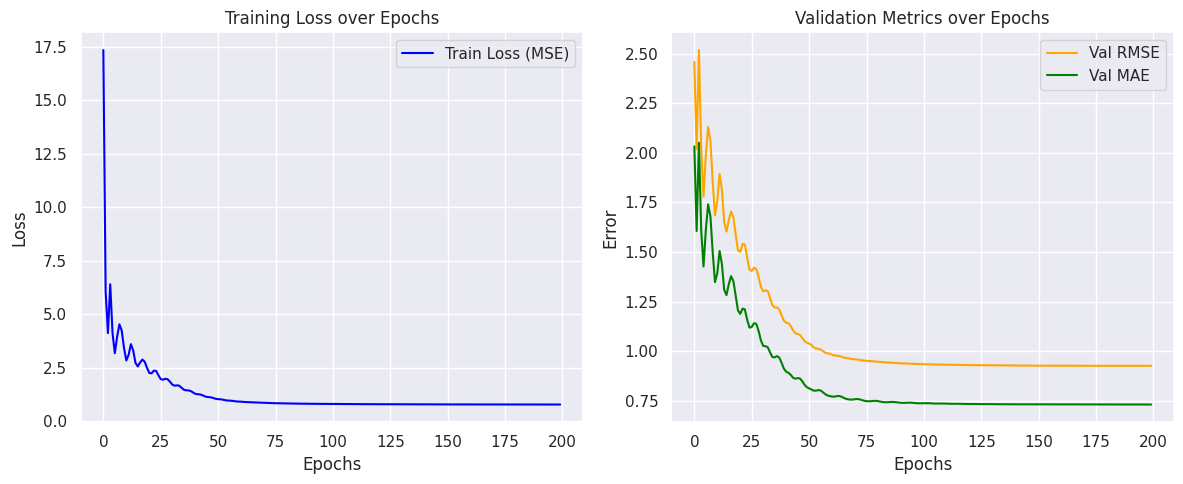

In [ ]:

import torch.nn.functional as F
import matplotlib.pyplot as plt  # Thư viện vẽ biểu đồ

# --- 1. Thiết lập ---
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=1e-5)

# Danh sách để lưu lịch sử huấn luyện
history = {
    'train_loss': [],
    'val_rmse': [],
    'val_mae': []
}

def train():
    model.train()
    optimizer.zero_grad()

    # Dự đoán
    pred = model(train_data.to(device))

    # Lấy nhãn thực tế
    target = train_data['user', 'rates', 'movie'].edge_label.to(device)

    # Tính Loss (MSE)
    loss = F.mse_loss(pred, target)
    loss.backward()
    optimizer.step()
    return loss.item()

def test(data_set):
    model.eval()
    with torch.no_grad():
        pred = model(data_set.to(device))
        target = data_set['user', 'rates', 'movie'].edge_label.to(device)

        loss = F.mse_loss(pred, target)
        rmse = loss.sqrt()
        mae = F.l1_loss(pred, target)

    return rmse.item(), mae.item()

# --- 2. Vòng lặp huấn luyện ---
print("\nBắt đầu huấn luyện...")
best_rmse = float('inf')

# Số lượng Epoch
epochs = 200

for epoch in range(1, epochs + 1):
    loss = train()
    val_rmse, val_mae = test(val_data)

    # === LƯU LẠI LỊCH SỬ ===
    history['train_loss'].append(loss)
    history['val_rmse'].append(val_rmse)
    history['val_mae'].append(val_mae)

    # Lưu model tốt nhất
    if val_rmse < best_rmse:
        best_rmse = val_rmse
        # torch.save(model.state_dict(), 'best_model.pth')

    # In thông tin mỗi 10 epoch
    if epoch % 10 == 0:
        print(f'Epoch: {epoch:03d} | Loss: {loss:.4f} | Val RMSE: {val_rmse:.4f} | Val MAE: {val_mae:.4f}')

print("-" * 30)
test_rmse, test_mae = test(test_data)
print(f'Final Test RMSE: {test_rmse:.4f}')
print(f'Final Test MAE:  {test_mae:.4f}')

# --- 3. VẼ BIỂU ĐỒ (VISUALIZATION) ---
plt.figure(figsize=(12, 5))

# Biểu đồ 1: Training Loss (MSE)
plt.subplot(1, 2, 1)
plt.plot(history['train_loss'], label='Train Loss (MSE)', color='blue')
plt.title('Training Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Biểu đồ 2: Validation Metrics (RMSE & MAE)
plt.subplot(1, 2, 2)
plt.plot(history['val_rmse'], label='Val RMSE', color='orange')
plt.plot(history['val_mae'], label='Val MAE', color='green')
plt.title('Validation Metrics over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
def recommend_movies(user_id_raw, k=10):
    model.eval()

    # 1. Lấy mapped ID của user
    if user_id_raw not in unique_user_id['user_id'].values:
        return "User ID not found."

    user_idx = unique_user_id.loc[unique_user_id['user_id'] == user_id_raw, 'mappedID'].item()

    # 2. Tìm những phim user ĐÃ xem để loại bỏ
    # Lưu ý: edge_index_user_to_movie đang ở CPU, ta đảm bảo nó ở CPU để so sánh sau này
    watched_movies_idx = edge_index_user_to_movie[1, edge_index_user_to_movie[0] == user_idx]

    # 3. Tạo danh sách tất cả phim candidates (chưa xem)
    all_movie_indices = torch.arange(data['movie'].num_nodes)

    # Chuẩn bị input giả lập: User này kết nối với TẤT CẢ movies
    num_movies = data['movie'].num_nodes
    u_idx_tensor = torch.full((num_movies,), user_idx, dtype=torch.long)
    edge_label_index = torch.stack([u_idx_tensor, all_movie_indices], dim=0)

    # Tạo batch dữ liệu để dự đoán
    batch = data.clone()
    batch['user', 'rates', 'movie'].edge_label_index = edge_label_index.to(device)

    # Dự đoán
    with torch.no_grad():
        pred_ratings = model(batch.to(device))

    # 4. Lấy Top K phim có điểm dự đoán cao nhất
    # Cộng thêm số lượng phim đã xem để trừ hao
    top_ratings, top_indices = torch.topk(pred_ratings, k + len(watched_movies_idx))

    # --- SỬA LỖI Ở ĐÂY ---
    # Chuyển tensor từ GPU về CPU trước khi xử lý bằng Python thuần
    top_ratings = top_ratings.cpu()
    top_indices = top_indices.cpu()
    watched_movies_idx = watched_movies_idx.cpu()
    # ---------------------

    # Map ngược lại ID gốc
    recommended_movies = []
    count = 0

    for rating, idx in zip(top_ratings, top_indices):
        # Dùng .item() để lấy giá trị số nguyên python, tránh lỗi tensor
        if idx.item() not in watched_movies_idx:
            movie_real_id = unique_movie_id.loc[unique_movie_id['mappedID'] == idx.item(), 'movie_id'].item()

            # Lấy thông tin phim từ df_movies
            movie_info = df_movies[df_movies['movie_id'] == movie_real_id].iloc[0]

            recommended_movies.append({
                'movie_id': movie_real_id,
                'title': movie_info['title'],
                'genre': movie_info['genre'],
                'predicted_rating': rating.item()
            })
            count += 1
            if count == k:
                break

    return pd.DataFrame(recommended_movies)

# Chạy lại test
print(recommend_movies(user_id_raw=1, k=5))

   movie_id             title           genre  predicted_rating
0      2264   We're No Angels           Drama          5.969821
1      3244  The Goodbye Girl  Comedy|Romance          5.695553
2       985     Small Wonders     Documentary          5.601233
3      2217   Elstree Calling  Comedy|Musical          5.216615
4        23         Assassins        Thriller          5.164843


In [ ]:
# Lưu mô hình
torch.save(model.state_dict(), 'gnn_recommender_model_bias.pth')
print("Đã lưu model thành công!")

# Cách load lại (khi cần dùng):
# 1. Khởi tạo kiến trúc model y hệt lúc train
# new_model = ContentBasedGNN(...)
# 2. Load weights
# new_model.load_state_dict(torch.load('gnn_recommender_model.pth'))
# new_model.eval()

Đã lưu model thành công!


In [ ]:
def evaluate_metrics(model, data_set, k=10):
    model.eval()
    with torch.no_grad():
        pred = model(data_set.to(device))
        target = data_set['user', 'rates', 'movie'].edge_label.to(device)

        # 1. Regression Metrics
        mse = F.mse_loss(pred, target).item()
        rmse = np.sqrt(mse)
        mae = F.l1_loss(pred, target).item()

        # 2. Ranking Metrics (Test-set Reranking)
        # Gom nhóm theo user để tính Precision/Recall
        user_indices = data_set['user', 'rates', 'movie'].edge_label_index[0].cpu().numpy()
        pred_np = pred.cpu().numpy()
        target_np = target.cpu().numpy()

        df_eval = pd.DataFrame({'user': user_indices, 'pred': pred_np, 'true': target_np})

        precisions, recalls = [], []

        for _, group in df_eval.groupby('user'):
            # Lấy top k phim có điểm dự đoán cao nhất
            top_k = group.nlargest(k, 'pred')

            # Ground truth: Phim user thực sự thích (rating >= 4)
            true_positives = group[group['true'] >= 4.0]

            if len(true_positives) == 0: continue

            # Đếm số phim trúng
            # (Ở đây đơn giản hóa: xem top K dự đoán có nằm trong tập user thích không)
            # Vì đây là reranking tập test, ta so sánh trực tiếp
            hits = len(top_k[top_k['true'] >= 4.0])

            precisions.append(hits / k)
            recalls.append(hits / len(true_positives))

    return rmse, mae, np.mean(precisions), np.mean(recalls)

rmse, mae, p_10, r_10 = evaluate_metrics(model, test_data, k=10)

print("\n" + "="*30)
print("KẾT QUẢ ĐÁNH GIÁ (TEST SET)")
print("="*30)
print(f"RMSE (Sai số bình phương trung bình): {rmse:.4f}")
print(f"MAE  (Sai số tuyệt đối trung bình):   {mae:.4f}")
print(f"Precision@10 (Độ chính xác Top 10):   {p_10:.4f}")
print(f"Recall@10    (Độ phủ Top 10):         {r_10:.4f}")
print("="*30)




KẾT QUẢ ĐÁNH GIÁ (TEST SET)
RMSE (Sai số bình phương trung bình): 0.9258
MAE  (Sai số tuyệt đối trung bình):   0.7316
Precision@10 (Độ chính xác Top 10):   0.5418
Recall@10    (Độ phủ Top 10):         0.7945



Đang tạo biểu đồ T-SNE Movie Embeddings...


/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


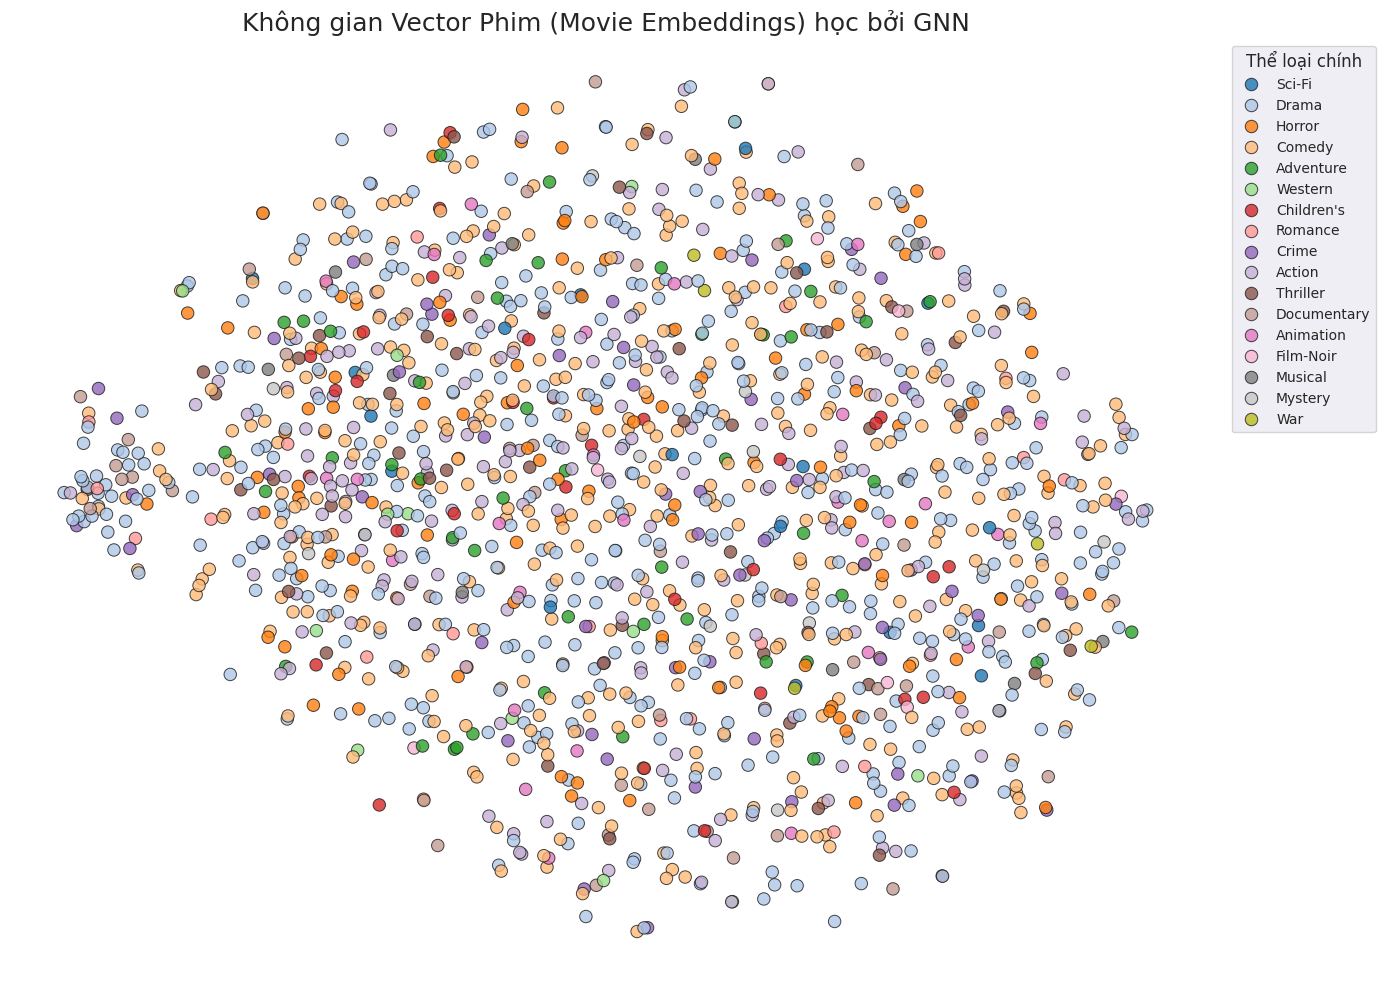

In [ ]:
from sklearn.manifold import TSNE
def get_embeddings_external(model, data):
    """
    Hàm lấy embedding từ model mà không cần định nghĩa lại class
    """
    model.eval()
    with torch.no_grad():
        # 1. Tạo input feature ban đầu
        # Kiểm tra xem đây là model Content-based (có movie_lin) hay model thường
        if hasattr(model, 'movie_lin'):
            # Nếu là model có dùng đặc trưng phim (Genre, Year...)
            x_dict = {
                'user': model.user_emb(torch.arange(data['user'].num_nodes).to(device)),
                'movie': model.movie_lin(data['movie'].x.to(device))
            }
        else:
            # Nếu là model chỉ dùng ID
            x_dict = {
                'user': model.user_emb(torch.arange(data['user'].num_nodes).to(device)),
                'movie': model.movie_emb(torch.arange(data['movie'].num_nodes).to(device))
            }

        # 2. Đưa qua lớp GNN để tổng hợp thông tin
        # Hàm model.gnn trả về dictionary chứa embedding mới của user và movie
        encoded_dict = model.gnn(x_dict, data.edge_index_dict)

        return encoded_dict

# --- SỬA LẠI ĐOẠN VISUALIZATION ---
print("\nĐang tạo biểu đồ T-SNE Movie Embeddings...")

# Gọi hàm rời vừa viết thay vì gọi method trong class
embeddings_dict = get_embeddings_external(model, data.to(device))
movie_emb = embeddings_dict['movie'].cpu().numpy()

# (Phần dưới giữ nguyên)
# Lấy mẫu 1500 phim để vẽ
indices = np.random.choice(len(movie_emb), 1500, replace=False)
emb_sample = movie_emb[indices]

# Lấy Genre chính để tô màu
labels = []
for i in indices:
    real_movie_id = unique_movie_id.iloc[i]['movie_id']
    # Tìm genre trong df_movies gốc
    g_str = df_movies[df_movies['movie_id'] == real_movie_id]['genre'].values
    if len(g_str) > 0:
        labels.append(g_str[0].split('|')[0]) # Lấy genre đầu tiên
    else:
        labels.append('Unknown')

# T-SNE
tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=42)
emb_2d = tsne.fit_transform(emb_sample)

# Vẽ plot
plt.figure(figsize=(14, 10))
sns.scatterplot(
    x=emb_2d[:, 0], y=emb_2d[:, 1],
    hue=labels, palette='tab20',
    s=80, alpha=0.8, edgecolor='k'
)
plt.title('Không gian Vector Phim (Movie Embeddings) học bởi GNN', fontsize=18)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', title='Thể loại chính', fontsize='small')
plt.axis('off')
plt.tight_layout()
plt.show()